[View in Colaboratory](https://colab.research.google.com/github/sudarshaana/bangali_neumerical_character/blob/master/benglali_digit_git_97_633(71e)_v1.ipynb)

In [10]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmpn40hj7vn/pubring.gpg' created
gpg: /tmp/tmpn40hj7vn/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [1]:
!mkdir -p drive
!google-drive-ocamlfuse drive

import os
os.chdir("drive")
!git clone https://sudarshaana@bitbucket.org/sudarshaana/benglali_digit.git

/bin/sh: 1: google-drive-ocamlfuse: not found
Cloning into 'benglali_digit'...
remote: Counting objects: 14925, done.
remote: Compressing objects: 100% (819/819), done.
remote: Total 14925 (delta 14106), reused 14925 (delta 14106)
Receiving objects: 100% (14925/14925), 9.19 MiB | 13.34 MiB/s, done.
Resolving deltas: 100% (14106/14106), done.
Checking out files: 100% (15000/15000), done.


In [2]:
ls

benglali_digit/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation
from keras.optimizers import RMSprop, adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [6]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

# define function to load train and test datasets 
# the function returns 3 numpy arrays with filenames, one-hot-encoded values and raw outputs
def load_dataset(path):
    data = load_files(path)
    alphabet_files = np.array(data['filenames'])
    targets = np.array(data['target'])
    #print(targets)
    alphabet_targets = np_utils.to_categorical(targets, 50)
    
    return alphabet_files, alphabet_targets, targets

# load train and test datasets
train_files, train_targets, raw_train_targets = load_dataset('benglali_digit/Train')
test_files, test_targets, raw_test_targets = load_dataset('benglali_digit/Test')

# load list of characters
alphabets = [item[25:-1] for item in sorted(glob("benglali_digit/Train/*/"))]

# print statistics about the dataset
print('There are %d total alphabets' % len(alphabets))
print('There are %s total alphabet images.\n' % len(np.hstack([train_files, test_files])))
print('There are %d training alphabet images.' % len(train_files))
print('There are %d test alphabet images.'% len(test_files))


[20 49 46 ... 41 44 11]
[ 5 17 26 ... 27 43 45]
There are 50 total alphabets
There are 15000 total alphabet images.

There are 12000 training alphabet images.
There are 3000 test alphabet images.


Distribution of the training data in the dataset


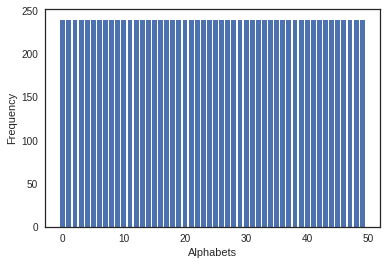

Distribution of the test data in the dataset


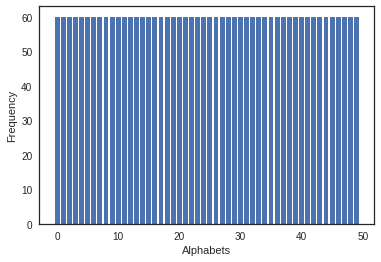

In [11]:
# Function to display the distribution of data in the training and test sets by alphabet classes
def plot_dist(target_set):
    plt.figure(figsize=(6,4))
    labels, values = zip(*target_set.items())
    #indexes = np.arange(len(labels))
    width = 0.8
    plt.bar(labels, values, width)
    plt.xlabel('Alphabets')
    plt.ylabel('Frequency')
    plt.show()

print('Distribution of the training data in the dataset')    
plot_dist(Counter(raw_train_targets))
print('Distribution of the test data in the dataset') 
plot_dist(Counter(raw_test_targets))

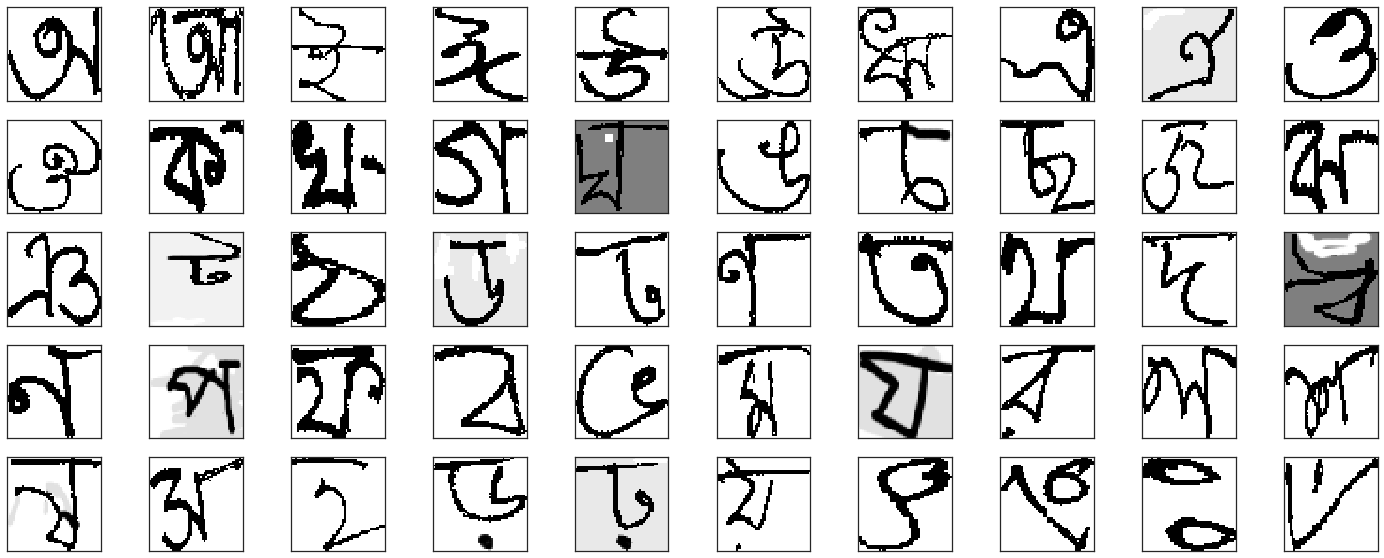

In [12]:
#Show sample images 
from keras.preprocessing import image                  
from keras.preprocessing.image import img_to_array, load_img
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True 

#Scan through the training dataset to pick up one random character each folder
alphabet_folders = sorted(glob("benglali_digit/Train/*/"))
sample_files = []
for folder in alphabet_folders:
    sample_files.append(glob(folder + "*.bmp")[np.random.randint(0,49)])
sample_files = np.array(sample_files)

#Display the characters
fig = plt.figure(figsize=(25,10))
for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(load_img(sample_files[i], target_size=(50,50), grayscale=True)), cmap = 'gray')
    ax.set_title("{}".format(alphabets[i]),
                 color="green")

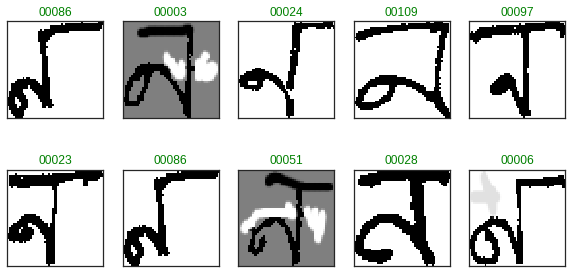

In [13]:
#View random characters in folders
sample_files = []
folder = 'benglali_digit/Train/202/'
for i in range(10):    
    sample_files.append(glob(folder + "*.bmp")[np.random.randint(0, 49)])

sample_files = np.array(sample_files)

fig = plt.figure(figsize=(10,5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(load_img(sample_files[i], target_size=(50,50), grayscale=True)), cmap = 'gray')
    ax.set_title("{}".format(sample_files[i][29:-4]),
                 color="green")

There are 50 total alphabets
There are 15000 total alphabet images.

There are 9600 training alphabet images.
There are 2400 validation alphabet images.
There are 3000 test alphabet images.

Distribution of the validation data in the dataset


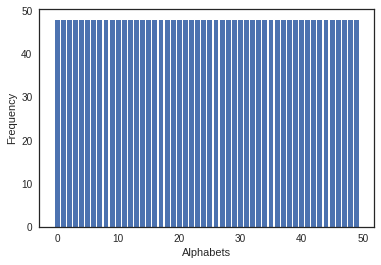

In [14]:
# Splitting the Training set into the Training set and Validation set
from sklearn.model_selection import train_test_split
train_files, valid_files, train_targets, valid_targets = train_test_split(train_files, train_targets, test_size = 0.2, random_state = 0, stratify = raw_train_targets)

# print statistics about the dataset post split
print('There are %d total alphabets' % len(alphabets))
print('There are %s total alphabet images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training alphabet images.' % len(train_files))
print('There are %d validation alphabet images.' % len(valid_files))
print('There are %d test alphabet images.\n'% len(test_files))

# Show distribution of data in validation set
raw_valid_targets = []
for i in range(len(valid_targets)):
    raw_valid_targets.append(np.argmax(valid_targets[i]))
    
raw_valid_targets = np.array(raw_valid_targets)
print('Distribution of the validation data in the dataset')  
plot_dist(Counter(raw_valid_targets))

In [15]:
### Prepare the Training, Validation and Test Datasets
def path_to_tensor(img_path):
    if 'bcc000060.db' not in img_path:
        # loads RGB image as PIL.Image.Image type
        img = load_img(img_path, target_size=(64, 64), grayscale=False)
        # convert PIL.Image.Image type to 3D tensor with shape (64, 64, 3)
        x = img_to_array(img)
        # convert 3D tensor to 4D tensor with shape (1, 64, 64, 3) and return 4D tensor
        return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in img_paths]
    return np.vstack(list_of_tensors)

# pre-process the data for Keras. We rescale the images by dividing every pixel in every image by 255. 
# So the scale is now 0-1 instead of 0-255.
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

# print number of training, validation, and test images
print(train_tensors.shape[0], 'train samples')
print(valid_tensors.shape[0], 'valid samples')
print(test_tensors.shape[0], 'test samples')

9600 train samples
2400 valid samples
3000 test samples


In [0]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense

In [0]:
model_ = Sequential()
model_.add(Conv2D(filters = 16, kernel_size = (7,7), padding = 'Same', activation='relu', input_shape = (train_tensors.shape[1:])))
model_.add(Conv2D(filters = 32, kernel_size = (7,7), padding = 'Same', activation='relu'))
model_.add(MaxPooling2D(pool_size = (2,2)))
model_.add(Dropout(0.2))

model_.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation='relu'))
model_.add(Conv2D(filters = 128, kernel_size = (4,4), padding = 'Same', activation = 'relu'))
model_.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model_.add(Dropout(0.3))

model_.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'Same', activation = 'relu'))

model_.add(Flatten())
model_.add(Dense(256, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(50, activation = 'sigmoid'))
#model_.summary()


from keras.optimizers import adam
from keras.callbacks import ReduceLROnPlateau
optimizer_ = adam(lr = 0.001, epsilon = 1e-08, decay = 0.0)
model_.compile(optimizer = optimizer_, loss = 'categorical_crossentropy', metrics = ['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',
                                           patience = 2,
                                           verbose = 1,
                                           factor = 0.5,
                                           min_lr = 0.00001)
epochs = 300
batch_size = 128

In [11]:
# Augment the training data 
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.2,  # randomly shift images vertically (10% of total height)
    rotation_range=15, 
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest') # randomly rotate images by 15 degrees

# create and configure augmented image generator
datagen_valid = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.2,  # randomly shift images vertically (10% of total height)
    rotation_range=15, 
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest')

# fit augmented image generator on data
datagen_train.fit(train_tensors)
datagen_valid.fit(valid_tensors)

from keras.callbacks import ModelCheckpoint   

#batch_size = 256
#epochs = 200

# train the model
checkpointer = ModelCheckpoint(filepath='weights.best.with_augmentation_new.hdf5', verbose=1, 
                               save_best_only=True)
history = model_.fit_generator(datagen_train.flow(train_tensors, train_targets, batch_size=batch_size),
                    steps_per_epoch=train_tensors.shape[0] // batch_size,
                    epochs=epochs, verbose=1, callbacks=[checkpointer, learning_rate_reduction],
                    validation_data=datagen_valid.flow(valid_tensors, valid_targets, batch_size=batch_size),
                    validation_steps=valid_tensors.shape[0] // batch_size)

Epoch 1/300
75/75 [==============================] - 27s 357ms/step - loss: 3.9113 - acc: 0.0222 - val_loss: 3.9120 - val_acc: 0.0200

Epoch 00001: val_loss improved from inf to 3.91202, saving model to weights.best.with_augmentation_new.hdf5
Epoch 2/300
75/75 [==============================] - 23s 303ms/step - loss: 3.9122 - acc: 0.0184 - val_loss: 3.9120 - val_acc: 0.0200

Epoch 00002: val_loss did not improve
Epoch 3/300
75/75 [==============================] - 23s 303ms/step - loss: 3.9059 - acc: 0.0211 - val_loss: 3.8666 - val_acc: 0.0308

Epoch 00003: val_loss improved from 3.91202 to 3.86658, saving model to weights.best.with_augmentation_new.hdf5
Epoch 4/300
37/75 [=============>................] - ETA: 9s - loss: 3.8678 - acc: 0.0338

75/75 [==============================] - 23s 304ms/step - loss: 3.8427 - acc: 0.0343 - val_loss: 3.7670 - val_acc: 0.0482

Epoch 00004: val_loss improved from 3.86658 to 3.76696, saving model to weights.best.with_augmentation_new.hdf5
Epoch 5/300
75/75 [==============================] - 23s 305ms/step - loss: 3.5985 - acc: 0.0754 - val_loss: 3.1503 - val_acc: 0.1636

Epoch 00005: val_loss improved from 3.76696 to 3.15032, saving model to weights.best.with_augmentation_new.hdf5
Epoch 6/300
75/75 [==============================] - 23s 307ms/step - loss: 3.0924 - acc: 0.1552 - val_loss: 2.6113 - val_acc: 0.3043

Epoch 00006: val_loss improved from 3.15032 to 2.61127, saving model to weights.best.with_augmentation_new.hdf5
Epoch 7/300
32/75 [===========>..................] - ETA: 10s - loss: 2.8030 - acc: 0.2053

75/75 [==============================] - 23s 305ms/step - loss: 2.7208 - acc: 0.2334 - val_loss: 2.3076 - val_acc: 0.3724

Epoch 00007: val_loss improved from 2.61127 to 2.30760, saving model to weights.best.with_augmentation_new.hdf5
Epoch 8/300
75/75 [==============================] - 23s 304ms/step - loss: 2.4368 - acc: 0.3023 - val_loss: 1.9355 - val_acc: 0.4518

Epoch 00008: val_loss improved from 2.30760 to 1.93551, saving model to weights.best.with_augmentation_new.hdf5
Epoch 9/300
75/75 [==============================] - 23s 304ms/step - loss: 2.1645 - acc: 0.3726 - val_loss: 1.7025 - val_acc: 0.5200

Epoch 00009: val_loss improved from 1.93551 to 1.70251, saving model to weights.best.with_augmentation_new.hdf5
Epoch 10/300
32/75 [===========>..................] - ETA: 10s - loss: 1.9747 - acc: 0.4182

75/75 [==============================] - 23s 305ms/step - loss: 1.9381 - acc: 0.4266 - val_loss: 1.4883 - val_acc: 0.5712

Epoch 00010: val_loss improved from 1.70251 to 1.48830, saving model to weights.best.with_augmentation_new.hdf5
Epoch 11/300
75/75 [==============================] - 23s 307ms/step - loss: 1.7546 - acc: 0.4764 - val_loss: 1.4189 - val_acc: 0.6159

Epoch 00011: val_loss improved from 1.48830 to 1.41888, saving model to weights.best.with_augmentation_new.hdf5
Epoch 12/300
75/75 [==============================] - 23s 305ms/step - loss: 1.6252 - acc: 0.5211 - val_loss: 1.1893 - val_acc: 0.6519

Epoch 00012: val_loss improved from 1.41888 to 1.18928, saving model to weights.best.with_augmentation_new.hdf5
Epoch 13/300
31/75 [===========>..................] - ETA: 10s - loss: 1.5025 - acc: 0.5446

75/75 [==============================] - 23s 303ms/step - loss: 1.5013 - acc: 0.5469 - val_loss: 1.0591 - val_acc: 0.6858

Epoch 00013: val_loss improved from 1.18928 to 1.05910, saving model to weights.best.with_augmentation_new.hdf5
Epoch 14/300
75/75 [==============================] - 23s 307ms/step - loss: 1.4028 - acc: 0.5797 - val_loss: 0.9348 - val_acc: 0.7305

Epoch 00014: val_loss improved from 1.05910 to 0.93480, saving model to weights.best.with_augmentation_new.hdf5
Epoch 15/300
75/75 [==============================] - 23s 307ms/step - loss: 1.2809 - acc: 0.6120 - val_loss: 0.8908 - val_acc: 0.7222

Epoch 00015: val_loss improved from 0.93480 to 0.89083, saving model to weights.best.with_augmentation_new.hdf5
Epoch 16/300
31/75 [===========>..................] - ETA: 10s - loss: 1.3039 - acc: 0.6099

75/75 [==============================] - 23s 308ms/step - loss: 1.2642 - acc: 0.6189 - val_loss: 0.8824 - val_acc: 0.7348

Epoch 00016: val_loss improved from 0.89083 to 0.88242, saving model to weights.best.with_augmentation_new.hdf5
Epoch 17/300
75/75 [==============================] - 23s 305ms/step - loss: 1.1495 - acc: 0.6504 - val_loss: 0.7739 - val_acc: 0.7669

Epoch 00017: val_loss improved from 0.88242 to 0.77392, saving model to weights.best.with_augmentation_new.hdf5
Epoch 18/300
75/75 [==============================] - 23s 305ms/step - loss: 1.1514 - acc: 0.6485 - val_loss: 0.7619 - val_acc: 0.7704

Epoch 00018: val_loss improved from 0.77392 to 0.76188, saving model to weights.best.with_augmentation_new.hdf5
Epoch 19/300
31/75 [===========>..................] - ETA: 10s - loss: 1.0924 - acc: 0.6694

75/75 [==============================] - 23s 305ms/step - loss: 1.0737 - acc: 0.6739 - val_loss: 0.6862 - val_acc: 0.7982

Epoch 00019: val_loss improved from 0.76188 to 0.68619, saving model to weights.best.with_augmentation_new.hdf5
Epoch 20/300
75/75 [==============================] - 23s 308ms/step - loss: 1.0410 - acc: 0.6827 - val_loss: 0.7211 - val_acc: 0.7899

Epoch 00020: val_loss did not improve
Epoch 21/300
75/75 [==============================] - 23s 309ms/step - loss: 1.0094 - acc: 0.6897 - val_loss: 0.7349 - val_acc: 0.7795

Epoch 00021: val_loss did not improve
Epoch 22/300
49/75 [==================>...........] - ETA: 6s - loss: 1.0040 - acc: 0.6969

75/75 [==============================] - 23s 309ms/step - loss: 0.9855 - acc: 0.7008 - val_loss: 0.6391 - val_acc: 0.8073

Epoch 00022: val_loss improved from 0.68619 to 0.63912, saving model to weights.best.with_augmentation_new.hdf5
Epoch 23/300
75/75 [==============================] - 23s 308ms/step - loss: 0.9237 - acc: 0.7188 - val_loss: 0.6520 - val_acc: 0.7982

Epoch 00023: val_loss did not improve
Epoch 24/300
75/75 [==============================] - 23s 308ms/step - loss: 0.9134 - acc: 0.7184 - val_loss: 0.6296 - val_acc: 0.8051

Epoch 00024: val_loss improved from 0.63912 to 0.62960, saving model to weights.best.with_augmentation_new.hdf5
Epoch 25/300
45/75 [=================>............] - ETA: 7s - loss: 0.8965 - acc: 0.7283

75/75 [==============================] - 23s 308ms/step - loss: 0.8815 - acc: 0.7293 - val_loss: 0.5856 - val_acc: 0.8164

Epoch 00025: val_loss improved from 0.62960 to 0.58563, saving model to weights.best.with_augmentation_new.hdf5
Epoch 26/300
75/75 [==============================] - 23s 309ms/step - loss: 0.8448 - acc: 0.7414 - val_loss: 0.5480 - val_acc: 0.8273

Epoch 00026: val_loss improved from 0.58563 to 0.54798, saving model to weights.best.with_augmentation_new.hdf5
Epoch 27/300
75/75 [==============================] - 23s 307ms/step - loss: 0.8131 - acc: 0.7471 - val_loss: 0.5172 - val_acc: 0.8433

Epoch 00027: val_loss improved from 0.54798 to 0.51718, saving model to weights.best.with_augmentation_new.hdf5
Epoch 28/300
32/75 [===========>..................] - ETA: 10s - loss: 0.8247 - acc: 0.7419

75/75 [==============================] - 23s 308ms/step - loss: 0.8240 - acc: 0.7444 - val_loss: 0.5163 - val_acc: 0.8459

Epoch 00028: val_loss improved from 0.51718 to 0.51633, saving model to weights.best.with_augmentation_new.hdf5
Epoch 29/300
75/75 [==============================] - 23s 310ms/step - loss: 0.8009 - acc: 0.7557 - val_loss: 0.5292 - val_acc: 0.8385

Epoch 00029: val_loss did not improve
Epoch 30/300
75/75 [==============================] - 23s 309ms/step - loss: 0.7693 - acc: 0.7591 - val_loss: 0.5089 - val_acc: 0.8411

Epoch 00030: val_loss improved from 0.51633 to 0.50889, saving model to weights.best.with_augmentation_new.hdf5
Epoch 31/300
43/75 [================>.............] - ETA: 7s - loss: 0.7470 - acc: 0.7727

75/75 [==============================] - 23s 309ms/step - loss: 0.7391 - acc: 0.7740 - val_loss: 0.4832 - val_acc: 0.8498

Epoch 00031: val_loss improved from 0.50889 to 0.48323, saving model to weights.best.with_augmentation_new.hdf5
Epoch 32/300
75/75 [==============================] - 23s 310ms/step - loss: 0.7309 - acc: 0.7740 - val_loss: 0.5200 - val_acc: 0.8429

Epoch 00032: val_loss did not improve
Epoch 33/300
75/75 [==============================] - 23s 309ms/step - loss: 0.7172 - acc: 0.7816 - val_loss: 0.4851 - val_acc: 0.8507

Epoch 00033: val_loss did not improve
Epoch 34/300
50/75 [===================>..........] - ETA: 6s - loss: 0.7088 - acc: 0.7845

75/75 [==============================] - 23s 309ms/step - loss: 0.7131 - acc: 0.7807 - val_loss: 0.4975 - val_acc: 0.8446

Epoch 00034: val_loss did not improve
Epoch 35/300
75/75 [==============================] - 23s 309ms/step - loss: 0.6763 - acc: 0.7924 - val_loss: 0.4539 - val_acc: 0.8507

Epoch 00035: val_loss improved from 0.48323 to 0.45394, saving model to weights.best.with_augmentation_new.hdf5
Epoch 36/300
75/75 [==============================] - 23s 310ms/step - loss: 0.6788 - acc: 0.7914 - val_loss: 0.4470 - val_acc: 0.8533

Epoch 00036: val_loss improved from 0.45394 to 0.44695, saving model to weights.best.with_augmentation_new.hdf5
Epoch 37/300
52/75 [===================>..........] - ETA: 5s - loss: 0.6775 - acc: 0.7871

75/75 [==============================] - 23s 310ms/step - loss: 0.6669 - acc: 0.7880 - val_loss: 0.4064 - val_acc: 0.8746

Epoch 00037: val_loss improved from 0.44695 to 0.40636, saving model to weights.best.with_augmentation_new.hdf5
Epoch 38/300
75/75 [==============================] - 23s 309ms/step - loss: 0.6472 - acc: 0.7991 - val_loss: 0.5042 - val_acc: 0.8381

Epoch 00038: val_loss did not improve
Epoch 39/300
75/75 [==============================] - 23s 309ms/step - loss: 0.6438 - acc: 0.8022 - val_loss: 0.4698 - val_acc: 0.8524

Epoch 00039: val_loss did not improve
Epoch 40/300
51/75 [===================>..........] - ETA: 5s - loss: 0.6502 - acc: 0.7967

75/75 [==============================] - 23s 310ms/step - loss: 0.6454 - acc: 0.7983 - val_loss: 0.4147 - val_acc: 0.8815

Epoch 00040: val_loss did not improve
Epoch 41/300
75/75 [==============================] - 23s 310ms/step - loss: 0.6311 - acc: 0.8061 - val_loss: 0.4550 - val_acc: 0.8568

Epoch 00041: val_loss did not improve
Epoch 42/300
75/75 [==============================] - 23s 310ms/step - loss: 0.6115 - acc: 0.8111 - val_loss: 0.4327 - val_acc: 0.8646

Epoch 00042: val_loss did not improve
Epoch 43/300
75/75 [==============================] - 23s 309ms/step - loss: 0.6027 - acc: 0.8129 - val_loss: 0.4156 - val_acc: 0.8698

Epoch 00043: val_loss did not improve

Epoch 00043: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 44/300


75/75 [==============================] - 23s 309ms/step - loss: 0.5702 - acc: 0.8216 - val_loss: 0.3708 - val_acc: 0.8850

Epoch 00044: val_loss improved from 0.40636 to 0.37077, saving model to weights.best.with_augmentation_new.hdf5
Epoch 45/300
75/75 [==============================] - 23s 308ms/step - loss: 0.5283 - acc: 0.8291 - val_loss: 0.3909 - val_acc: 0.8845

Epoch 00045: val_loss did not improve
Epoch 46/300
75/75 [==============================] - 23s 310ms/step - loss: 0.5247 - acc: 0.8404 - val_loss: 0.3760 - val_acc: 0.8872

Epoch 00046: val_loss did not improve
Epoch 47/300
45/75 [=================>............] - ETA: 7s - loss: 0.5125 - acc: 0.8373

75/75 [==============================] - 23s 310ms/step - loss: 0.5208 - acc: 0.8376 - val_loss: 0.3694 - val_acc: 0.8872

Epoch 00047: val_loss improved from 0.37077 to 0.36936, saving model to weights.best.with_augmentation_new.hdf5
Epoch 48/300
75/75 [==============================] - 23s 311ms/step - loss: 0.4943 - acc: 0.8485 - val_loss: 0.3907 - val_acc: 0.8759

Epoch 00048: val_loss did not improve
Epoch 49/300
75/75 [==============================] - 23s 309ms/step - loss: 0.5226 - acc: 0.8355 - val_loss: 0.3519 - val_acc: 0.8919

Epoch 00049: val_loss improved from 0.36936 to 0.35188, saving model to weights.best.with_augmentation_new.hdf5
Epoch 50/300
44/75 [================>.............] - ETA: 7s - loss: 0.4861 - acc: 0.8477

75/75 [==============================] - 23s 310ms/step - loss: 0.4956 - acc: 0.8428 - val_loss: 0.3462 - val_acc: 0.8967

Epoch 00050: val_loss improved from 0.35188 to 0.34618, saving model to weights.best.with_augmentation_new.hdf5
Epoch 51/300
75/75 [==============================] - 23s 309ms/step - loss: 0.4994 - acc: 0.8467 - val_loss: 0.3566 - val_acc: 0.8945

Epoch 00051: val_loss did not improve
Epoch 52/300
75/75 [==============================] - 23s 309ms/step - loss: 0.4680 - acc: 0.8538 - val_loss: 0.3346 - val_acc: 0.8989

Epoch 00052: val_loss improved from 0.34618 to 0.33455, saving model to weights.best.with_augmentation_new.hdf5
Epoch 53/300
44/75 [================>.............] - ETA: 7s - loss: 0.4836 - acc: 0.8461

75/75 [==============================] - 23s 308ms/step - loss: 0.4880 - acc: 0.8479 - val_loss: 0.3437 - val_acc: 0.8976

Epoch 00053: val_loss did not improve
Epoch 54/300
75/75 [==============================] - 23s 308ms/step - loss: 0.4821 - acc: 0.8468 - val_loss: 0.3612 - val_acc: 0.8963

Epoch 00054: val_loss did not improve
Epoch 55/300
75/75 [==============================] - 23s 311ms/step - loss: 0.4952 - acc: 0.8449 - val_loss: 0.3774 - val_acc: 0.8893

Epoch 00055: val_loss did not improve

Epoch 00055: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 56/300
66/75 [=========================>....] - ETA: 2s - loss: 0.4520 - acc: 0.8559

75/75 [==============================] - 23s 309ms/step - loss: 0.4524 - acc: 0.8572 - val_loss: 0.3353 - val_acc: 0.8971

Epoch 00056: val_loss did not improve
Epoch 57/300
75/75 [==============================] - 23s 311ms/step - loss: 0.4515 - acc: 0.8559 - val_loss: 0.3121 - val_acc: 0.9041

Epoch 00057: val_loss improved from 0.33455 to 0.31211, saving model to weights.best.with_augmentation_new.hdf5
Epoch 58/300
75/75 [==============================] - 23s 310ms/step - loss: 0.4509 - acc: 0.8622 - val_loss: 0.3128 - val_acc: 0.8967

Epoch 00058: val_loss did not improve
Epoch 59/300
61/75 [=======================>......] - ETA: 3s - loss: 0.4215 - acc: 0.8654

75/75 [==============================] - 23s 308ms/step - loss: 0.4287 - acc: 0.8639 - val_loss: 0.3158 - val_acc: 0.9041

Epoch 00059: val_loss did not improve
Epoch 60/300
75/75 [==============================] - 23s 310ms/step - loss: 0.4293 - acc: 0.8682 - val_loss: 0.3289 - val_acc: 0.8997

Epoch 00060: val_loss did not improve

Epoch 00060: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 61/300
75/75 [==============================] - 23s 309ms/step - loss: 0.4301 - acc: 0.8625 - val_loss: 0.2958 - val_acc: 0.9045

Epoch 00061: val_loss improved from 0.31211 to 0.29581, saving model to weights.best.with_augmentation_new.hdf5
Epoch 62/300
52/75 [===================>..........] - ETA: 5s - loss: 0.4140 - acc: 0.8712

75/75 [==============================] - 23s 310ms/step - loss: 0.4084 - acc: 0.8713 - val_loss: 0.3035 - val_acc: 0.9049

Epoch 00062: val_loss did not improve
Epoch 63/300
75/75 [==============================] - 23s 309ms/step - loss: 0.4259 - acc: 0.8670 - val_loss: 0.3236 - val_acc: 0.8989

Epoch 00063: val_loss did not improve
Epoch 64/300
75/75 [==============================] - 23s 308ms/step - loss: 0.4203 - acc: 0.8642 - val_loss: 0.2966 - val_acc: 0.9002

Epoch 00064: val_loss did not improve
Epoch 65/300
75/75 [==============================] - 23s 308ms/step - loss: 0.4197 - acc: 0.8683 - val_loss: 0.2800 - val_acc: 0.9136

Epoch 00065: val_loss improved from 0.29581 to 0.28003, saving model to weights.best.with_augmentation_new.hdf5


Epoch 66/300
75/75 [==============================] - 23s 309ms/step - loss: 0.4165 - acc: 0.8694 - val_loss: 0.2936 - val_acc: 0.9041

Epoch 00066: val_loss did not improve
Epoch 67/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3987 - acc: 0.8721 - val_loss: 0.2932 - val_acc: 0.9089

Epoch 00067: val_loss did not improve
Epoch 68/300
75/75 [==============================] - 23s 310ms/step - loss: 0.4007 - acc: 0.8704 - val_loss: 0.3105 - val_acc: 0.9023

Epoch 00068: val_loss did not improve

Epoch 00068: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 69/300
56/75 [=====================>........] - ETA: 4s - loss: 0.4006 - acc: 0.8726

75/75 [==============================] - 23s 310ms/step - loss: 0.3981 - acc: 0.8753 - val_loss: 0.3145 - val_acc: 0.9041

Epoch 00069: val_loss did not improve
Epoch 70/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3933 - acc: 0.8736 - val_loss: 0.3134 - val_acc: 0.9062

Epoch 00070: val_loss did not improve

Epoch 00070: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 71/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3776 - acc: 0.8804 - val_loss: 0.2959 - val_acc: 0.9062

Epoch 00071: val_loss did not improve
Epoch 72/300
59/75 [======================>.......] - ETA: 3s - loss: 0.3784 - acc: 0.8818

75/75 [==============================] - 23s 309ms/step - loss: 0.3844 - acc: 0.8783 - val_loss: 0.2801 - val_acc: 0.9162

Epoch 00072: val_loss did not improve
Epoch 73/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3936 - acc: 0.8740 - val_loss: 0.3322 - val_acc: 0.8932

Epoch 00073: val_loss did not improve
Epoch 74/300
75/75 [==============================] - 23s 310ms/step - loss: 0.4065 - acc: 0.8742 - val_loss: 0.3002 - val_acc: 0.9102

Epoch 00074: val_loss did not improve
Epoch 75/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3986 - acc: 0.8759 - val_loss: 0.3099 - val_acc: 0.9093

Epoch 00075: val_loss did not improve

Epoch 00075: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
Epoch 76/300
 1/75 [..............................] - ETA: 18s - loss: 0.3798 - acc: 0.8906

75/75 [==============================] - 23s 309ms/step - loss: 0.3945 - acc: 0.8758 - val_loss: 0.2975 - val_acc: 0.9089

Epoch 00076: val_loss did not improve
Epoch 77/300
75/75 [==============================] - 23s 309ms/step - loss: 0.4082 - acc: 0.8716 - val_loss: 0.3172 - val_acc: 0.9084

Epoch 00077: val_loss did not improve

Epoch 00077: ReduceLROnPlateau reducing learning rate to 1e-05.
Epoch 78/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3846 - acc: 0.8798 - val_loss: 0.3020 - val_acc: 0.9062

Epoch 00078: val_loss did not improve
Epoch 79/300
56/75 [=====================>........] - ETA: 4s - loss: 0.3892 - acc: 0.8754

75/75 [==============================] - 23s 308ms/step - loss: 0.3877 - acc: 0.8753 - val_loss: 0.2929 - val_acc: 0.9049

Epoch 00079: val_loss did not improve
Epoch 80/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3839 - acc: 0.8766 - val_loss: 0.2891 - val_acc: 0.9049

Epoch 00080: val_loss did not improve
Epoch 81/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3911 - acc: 0.8817 - val_loss: 0.2841 - val_acc: 0.9145

Epoch 00081: val_loss did not improve
Epoch 82/300
75/75 [==============================] - 23s 309ms/step - loss: 0.4003 - acc: 0.8738 - val_loss: 0.2979 - val_acc: 0.9158

Epoch 00082: val_loss did not improve
Epoch 83/300
 1/75 [..............................] - ETA: 18s - loss: 0.3679 - acc: 0.9141

75/75 [==============================] - 23s 309ms/step - loss: 0.4000 - acc: 0.8787 - val_loss: 0.3183 - val_acc: 0.8950

Epoch 00083: val_loss did not improve
Epoch 84/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3885 - acc: 0.8783 - val_loss: 0.2854 - val_acc: 0.9076

Epoch 00084: val_loss did not improve
Epoch 85/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3924 - acc: 0.8741 - val_loss: 0.2659 - val_acc: 0.9167

Epoch 00085: val_loss improved from 0.28003 to 0.26591, saving model to weights.best.with_augmentation_new.hdf5
Epoch 86/300
61/75 [=======================>......] - ETA: 3s - loss: 0.3904 - acc: 0.8759

75/75 [==============================] - 23s 309ms/step - loss: 0.3863 - acc: 0.8784 - val_loss: 0.2901 - val_acc: 0.9071

Epoch 00086: val_loss did not improve
Epoch 87/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3995 - acc: 0.8757 - val_loss: 0.2985 - val_acc: 0.9115

Epoch 00087: val_loss did not improve
Epoch 88/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3877 - acc: 0.8784 - val_loss: 0.3291 - val_acc: 0.9023

Epoch 00088: val_loss did not improve
Epoch 89/300
75/75 [==============================] - 23s 310ms/step - loss: 0.4039 - acc: 0.8736 - val_loss: 0.2867 - val_acc: 0.9058

Epoch 00089: val_loss did not improve
Epoch 90/300
 1/75 [..............................] - ETA: 17s - loss: 0.4374 - acc: 0.8516

75/75 [==============================] - 23s 310ms/step - loss: 0.3977 - acc: 0.8784 - val_loss: 0.2986 - val_acc: 0.9006

Epoch 00090: val_loss did not improve
Epoch 91/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3977 - acc: 0.8753 - val_loss: 0.2761 - val_acc: 0.9106

Epoch 00091: val_loss did not improve
Epoch 92/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3881 - acc: 0.8802 - val_loss: 0.2920 - val_acc: 0.9123

Epoch 00092: val_loss did not improve
Epoch 93/300
70/75 [===========================>..] - ETA: 1s - loss: 0.3820 - acc: 0.8792

75/75 [==============================] - 23s 309ms/step - loss: 0.3791 - acc: 0.8795 - val_loss: 0.2689 - val_acc: 0.9106

Epoch 00093: val_loss did not improve
Epoch 94/300
75/75 [==============================] - 23s 308ms/step - loss: 0.3871 - acc: 0.8742 - val_loss: 0.2857 - val_acc: 0.9128

Epoch 00094: val_loss did not improve
Epoch 95/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3849 - acc: 0.8744 - val_loss: 0.3018 - val_acc: 0.9028

Epoch 00095: val_loss did not improve
Epoch 96/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3775 - acc: 0.8831 - val_loss: 0.2749 - val_acc: 0.9162

Epoch 00096: val_loss did not improve
Epoch 97/300
 2/75 [..............................] - ETA: 19s - loss: 0.4690 - acc: 0.8711

75/75 [==============================] - 23s 308ms/step - loss: 0.3921 - acc: 0.8758 - val_loss: 0.3124 - val_acc: 0.9032

Epoch 00097: val_loss did not improve
Epoch 98/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3917 - acc: 0.8769 - val_loss: 0.2922 - val_acc: 0.9093

Epoch 00098: val_loss did not improve
Epoch 99/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3893 - acc: 0.8798 - val_loss: 0.2992 - val_acc: 0.9071

Epoch 00099: val_loss did not improve
Epoch 100/300
70/75 [===========================>..] - ETA: 1s - loss: 0.3904 - acc: 0.8766

75/75 [==============================] - 23s 310ms/step - loss: 0.3894 - acc: 0.8773 - val_loss: 0.2836 - val_acc: 0.9171

Epoch 00100: val_loss did not improve
Epoch 101/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3811 - acc: 0.8817 - val_loss: 0.2900 - val_acc: 0.9084

Epoch 00101: val_loss did not improve
Epoch 102/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3920 - acc: 0.8787 - val_loss: 0.2822 - val_acc: 0.9023

Epoch 00102: val_loss did not improve
Epoch 103/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3798 - acc: 0.8827 - val_loss: 0.3053 - val_acc: 0.9058

Epoch 00103: val_loss did not improve
Epoch 104/300
 1/75 [..............................] - ETA: 17s - loss: 0.4398 - acc: 0.8672

75/75 [==============================] - 23s 310ms/step - loss: 0.4038 - acc: 0.8740 - val_loss: 0.2801 - val_acc: 0.9141

Epoch 00104: val_loss did not improve
Epoch 105/300
75/75 [==============================] - 23s 309ms/step - loss: 0.4007 - acc: 0.8796 - val_loss: 0.2787 - val_acc: 0.9149

Epoch 00105: val_loss did not improve
Epoch 106/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3881 - acc: 0.8821 - val_loss: 0.2721 - val_acc: 0.9167

Epoch 00106: val_loss did not improve
Epoch 107/300
69/75 [==========================>...] - ETA: 1s - loss: 0.4108 - acc: 0.8706

75/75 [==============================] - 23s 310ms/step - loss: 0.4072 - acc: 0.8718 - val_loss: 0.2946 - val_acc: 0.9128

Epoch 00107: val_loss did not improve
Epoch 108/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3850 - acc: 0.8769 - val_loss: 0.3029 - val_acc: 0.9093

Epoch 00108: val_loss did not improve
Epoch 109/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3864 - acc: 0.8791 - val_loss: 0.3270 - val_acc: 0.9067

Epoch 00109: val_loss did not improve
Epoch 110/300
75/75 [==============================] - 23s 308ms/step - loss: 0.3890 - acc: 0.8723 - val_loss: 0.3145 - val_acc: 0.9002

Epoch 00110: val_loss did not improve
Epoch 111/300
 1/75 [..............................] - ETA: 20s - loss: 0.3267 - acc: 0.8906

75/75 [==============================] - 23s 311ms/step - loss: 0.3806 - acc: 0.8798 - val_loss: 0.3113 - val_acc: 0.9023

Epoch 00111: val_loss did not improve
Epoch 112/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3839 - acc: 0.8762 - val_loss: 0.2949 - val_acc: 0.9110

Epoch 00112: val_loss did not improve
Epoch 113/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3893 - acc: 0.8748 - val_loss: 0.2777 - val_acc: 0.9110

Epoch 00113: val_loss did not improve
Epoch 114/300
69/75 [==========================>...] - ETA: 1s - loss: 0.3977 - acc: 0.8723

75/75 [==============================] - 23s 309ms/step - loss: 0.3963 - acc: 0.8722 - val_loss: 0.2981 - val_acc: 0.9136

Epoch 00114: val_loss did not improve
Epoch 115/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3780 - acc: 0.8776 - val_loss: 0.2588 - val_acc: 0.9210

Epoch 00115: val_loss improved from 0.26591 to 0.25878, saving model to weights.best.with_augmentation_new.hdf5
Epoch 116/300
75/75 [==============================] - 23s 308ms/step - loss: 0.3821 - acc: 0.8795 - val_loss: 0.3061 - val_acc: 0.9076

Epoch 00116: val_loss did not improve
Epoch 117/300
60/75 [=======================>......] - ETA: 3s - loss: 0.3740 - acc: 0.8809

75/75 [==============================] - 23s 309ms/step - loss: 0.3806 - acc: 0.8797 - val_loss: 0.3020 - val_acc: 0.9106

Epoch 00117: val_loss did not improve
Epoch 118/300
75/75 [==============================] - 23s 310ms/step - loss: 0.4037 - acc: 0.8733 - val_loss: 0.3004 - val_acc: 0.9032

Epoch 00118: val_loss did not improve
Epoch 119/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3948 - acc: 0.8757 - val_loss: 0.3189 - val_acc: 0.9015

Epoch 00119: val_loss did not improve
Epoch 120/300
75/75 [==============================] - 23s 310ms/step - loss: 0.4012 - acc: 0.8758 - val_loss: 0.2932 - val_acc: 0.9110

Epoch 00120: val_loss did not improve
Epoch 121/300


75/75 [==============================] - 23s 310ms/step - loss: 0.4007 - acc: 0.8744 - val_loss: 0.3092 - val_acc: 0.8989

Epoch 00121: val_loss did not improve
Epoch 122/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3759 - acc: 0.8778 - val_loss: 0.2883 - val_acc: 0.9062

Epoch 00122: val_loss did not improve
Epoch 123/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3849 - acc: 0.8792 - val_loss: 0.2891 - val_acc: 0.9067

Epoch 00123: val_loss did not improve
Epoch 124/300
69/75 [==========================>...] - ETA: 1s - loss: 0.3789 - acc: 0.8766

75/75 [==============================] - 23s 310ms/step - loss: 0.3779 - acc: 0.8769 - val_loss: 0.3032 - val_acc: 0.9045

Epoch 00124: val_loss did not improve
Epoch 125/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3879 - acc: 0.8767 - val_loss: 0.2936 - val_acc: 0.9145

Epoch 00125: val_loss did not improve
Epoch 126/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3961 - acc: 0.8766 - val_loss: 0.2930 - val_acc: 0.9123

Epoch 00126: val_loss did not improve
Epoch 127/300
75/75 [==============================] - 23s 309ms/step - loss: 0.4045 - acc: 0.8742 - val_loss: 0.3254 - val_acc: 0.9019

Epoch 00127: val_loss did not improve
Epoch 128/300
 1/75 [..............................] - ETA: 17s - loss: 0.5495 - acc: 0.8281

75/75 [==============================] - 23s 309ms/step - loss: 0.3879 - acc: 0.8793 - val_loss: 0.3049 - val_acc: 0.9071

Epoch 00128: val_loss did not improve
Epoch 129/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3935 - acc: 0.8775 - val_loss: 0.2815 - val_acc: 0.9119

Epoch 00129: val_loss did not improve
Epoch 130/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3946 - acc: 0.8809 - val_loss: 0.2935 - val_acc: 0.9080

Epoch 00130: val_loss did not improve
Epoch 131/300
69/75 [==========================>...] - ETA: 1s - loss: 0.3834 - acc: 0.8787

75/75 [==============================] - 23s 308ms/step - loss: 0.3838 - acc: 0.8784 - val_loss: 0.3010 - val_acc: 0.9084

Epoch 00131: val_loss did not improve
Epoch 132/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3870 - acc: 0.8759 - val_loss: 0.3218 - val_acc: 0.8976

Epoch 00132: val_loss did not improve
Epoch 133/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3733 - acc: 0.8863 - val_loss: 0.3053 - val_acc: 0.9058

Epoch 00133: val_loss did not improve
Epoch 134/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3550 - acc: 0.8836 - val_loss: 0.2995 - val_acc: 0.9045

Epoch 00134: val_loss did not improve
Epoch 135/300
 1/75 [..............................] - ETA: 20s - loss: 0.2940 - acc: 0.9297

75/75 [==============================] - 23s 310ms/step - loss: 0.4030 - acc: 0.8727 - val_loss: 0.2864 - val_acc: 0.9110

Epoch 00135: val_loss did not improve
Epoch 136/300
75/75 [==============================] - 23s 309ms/step - loss: 0.4078 - acc: 0.8735 - val_loss: 0.2831 - val_acc: 0.9175

Epoch 00136: val_loss did not improve
Epoch 137/300
75/75 [==============================] - 23s 308ms/step - loss: 0.3887 - acc: 0.8770 - val_loss: 0.3070 - val_acc: 0.9036

Epoch 00137: val_loss did not improve
Epoch 138/300
69/75 [==========================>...] - ETA: 1s - loss: 0.3823 - acc: 0.8799

75/75 [==============================] - 23s 310ms/step - loss: 0.3799 - acc: 0.8805 - val_loss: 0.3028 - val_acc: 0.9084

Epoch 00138: val_loss did not improve
Epoch 139/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3897 - acc: 0.8767 - val_loss: 0.3190 - val_acc: 0.9049

Epoch 00139: val_loss did not improve
Epoch 140/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3867 - acc: 0.8783 - val_loss: 0.2995 - val_acc: 0.8997

Epoch 00140: val_loss did not improve
Epoch 141/300
75/75 [==============================] - 23s 309ms/step - loss: 0.4041 - acc: 0.8729 - val_loss: 0.2867 - val_acc: 0.9110

Epoch 00141: val_loss did not improve
Epoch 142/300
 1/75 [..............................] - ETA: 17s - loss: 0.3508 - acc: 0.9062

75/75 [==============================] - 23s 309ms/step - loss: 0.3832 - acc: 0.8733 - val_loss: 0.3059 - val_acc: 0.8989

Epoch 00142: val_loss did not improve
Epoch 143/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3964 - acc: 0.8740 - val_loss: 0.2870 - val_acc: 0.9102

Epoch 00143: val_loss did not improve
Epoch 144/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3933 - acc: 0.8811 - val_loss: 0.2766 - val_acc: 0.9214

Epoch 00144: val_loss did not improve
Epoch 145/300
69/75 [==========================>...] - ETA: 1s - loss: 0.3756 - acc: 0.8837

75/75 [==============================] - 23s 310ms/step - loss: 0.3758 - acc: 0.8839 - val_loss: 0.2876 - val_acc: 0.9058

Epoch 00145: val_loss did not improve
Epoch 146/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3854 - acc: 0.8756 - val_loss: 0.3031 - val_acc: 0.9054

Epoch 00146: val_loss did not improve
Epoch 147/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3618 - acc: 0.8787 - val_loss: 0.2900 - val_acc: 0.9071

Epoch 00147: val_loss did not improve
Epoch 148/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3793 - acc: 0.8799 - val_loss: 0.2831 - val_acc: 0.9136

Epoch 00148: val_loss did not improve
Epoch 149/300
 1/75 [..............................] - ETA: 20s - loss: 0.4671 - acc: 0.8359

75/75 [==============================] - 23s 310ms/step - loss: 0.3745 - acc: 0.8802 - val_loss: 0.2632 - val_acc: 0.9162

Epoch 00149: val_loss did not improve
Epoch 150/300
75/75 [==============================] - 23s 308ms/step - loss: 0.3903 - acc: 0.8754 - val_loss: 0.2817 - val_acc: 0.9102

Epoch 00150: val_loss did not improve
Epoch 151/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3816 - acc: 0.8785 - val_loss: 0.2817 - val_acc: 0.9084

Epoch 00151: val_loss did not improve
Epoch 152/300
69/75 [==========================>...] - ETA: 1s - loss: 0.3800 - acc: 0.8792

75/75 [==============================] - 23s 310ms/step - loss: 0.3826 - acc: 0.8778 - val_loss: 0.3015 - val_acc: 0.9110

Epoch 00152: val_loss did not improve
Epoch 153/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3638 - acc: 0.8854 - val_loss: 0.2911 - val_acc: 0.9106

Epoch 00153: val_loss did not improve
Epoch 154/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3670 - acc: 0.8819 - val_loss: 0.2952 - val_acc: 0.9123

Epoch 00154: val_loss did not improve
Epoch 155/300
75/75 [==============================] - 23s 308ms/step - loss: 0.3760 - acc: 0.8821 - val_loss: 0.3018 - val_acc: 0.9071

Epoch 00155: val_loss did not improve
Epoch 156/300
 1/75 [..............................] - ETA: 18s - loss: 0.2419 - acc: 0.9141

75/75 [==============================] - 23s 311ms/step - loss: 0.3830 - acc: 0.8814 - val_loss: 0.2570 - val_acc: 0.9201

Epoch 00156: val_loss improved from 0.25878 to 0.25701, saving model to weights.best.with_augmentation_new.hdf5
Epoch 157/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3800 - acc: 0.8789 - val_loss: 0.2720 - val_acc: 0.9149

Epoch 00157: val_loss did not improve
Epoch 158/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3898 - acc: 0.8779 - val_loss: 0.3058 - val_acc: 0.9084

Epoch 00158: val_loss did not improve
Epoch 159/300
44/75 [================>.............] - ETA: 7s - loss: 0.3837 - acc: 0.8750

75/75 [==============================] - 23s 311ms/step - loss: 0.3789 - acc: 0.8784 - val_loss: 0.2714 - val_acc: 0.9162

Epoch 00159: val_loss did not improve
Epoch 160/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3815 - acc: 0.8759 - val_loss: 0.2595 - val_acc: 0.9136

Epoch 00160: val_loss did not improve
Epoch 161/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3910 - acc: 0.8757 - val_loss: 0.2906 - val_acc: 0.9054

Epoch 00161: val_loss did not improve
Epoch 162/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3782 - acc: 0.8801 - val_loss: 0.2994 - val_acc: 0.9119



Epoch 00162: val_loss did not improve
Epoch 163/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3910 - acc: 0.8753 - val_loss: 0.2739 - val_acc: 0.9193

Epoch 00163: val_loss did not improve
Epoch 164/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3828 - acc: 0.8795 - val_loss: 0.3021 - val_acc: 0.9084

Epoch 00164: val_loss did not improve
Epoch 165/300
75/75 [==============================] - 23s 308ms/step - loss: 0.3698 - acc: 0.8845 - val_loss: 0.2782 - val_acc: 0.9123

Epoch 00165: val_loss did not improve
Epoch 166/300
45/75 [=================>............] - ETA: 7s - loss: 0.3818 - acc: 0.8821

75/75 [==============================] - 23s 311ms/step - loss: 0.3791 - acc: 0.8820 - val_loss: 0.3182 - val_acc: 0.9028

Epoch 00166: val_loss did not improve
Epoch 167/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3833 - acc: 0.8798 - val_loss: 0.2998 - val_acc: 0.9071

Epoch 00167: val_loss did not improve
Epoch 168/300
75/75 [==============================] - 23s 308ms/step - loss: 0.3772 - acc: 0.8777 - val_loss: 0.3159 - val_acc: 0.8997

Epoch 00168: val_loss did not improve
Epoch 169/300
75/75 [==============================] - 23s 306ms/step - loss: 0.3869 - acc: 0.8803 - val_loss: 0.3059 - val_acc: 0.9028



Epoch 00169: val_loss did not improve
Epoch 170/300
75/75 [==============================] - 23s 304ms/step - loss: 0.3754 - acc: 0.8809 - val_loss: 0.2867 - val_acc: 0.9132

Epoch 00170: val_loss did not improve
Epoch 171/300
75/75 [==============================] - 23s 304ms/step - loss: 0.3774 - acc: 0.8869 - val_loss: 0.2979 - val_acc: 0.9076

Epoch 00171: val_loss did not improve
Epoch 172/300
75/75 [==============================] - 23s 304ms/step - loss: 0.3871 - acc: 0.8768 - val_loss: 0.2679 - val_acc: 0.9123

Epoch 00172: val_loss did not improve
Epoch 173/300
45/75 [=================>............] - ETA: 7s - loss: 0.3713 - acc: 0.8833

75/75 [==============================] - 23s 304ms/step - loss: 0.3764 - acc: 0.8791 - val_loss: 0.2764 - val_acc: 0.9197

Epoch 00173: val_loss did not improve
Epoch 174/300
75/75 [==============================] - 23s 302ms/step - loss: 0.3780 - acc: 0.8812 - val_loss: 0.2807 - val_acc: 0.9158

Epoch 00174: val_loss did not improve
Epoch 175/300
75/75 [==============================] - 23s 302ms/step - loss: 0.3640 - acc: 0.8856 - val_loss: 0.2996 - val_acc: 0.9032

Epoch 00175: val_loss did not improve
Epoch 176/300
75/75 [==============================] - 23s 303ms/step - loss: 0.3765 - acc: 0.8816 - val_loss: 0.2768 - val_acc: 0.9154



Epoch 00176: val_loss did not improve
Epoch 177/300
75/75 [==============================] - 23s 303ms/step - loss: 0.3721 - acc: 0.8828 - val_loss: 0.2974 - val_acc: 0.9132

Epoch 00177: val_loss did not improve
Epoch 178/300
75/75 [==============================] - 23s 300ms/step - loss: 0.3834 - acc: 0.8779 - val_loss: 0.2701 - val_acc: 0.9102

Epoch 00178: val_loss did not improve
Epoch 179/300
75/75 [==============================] - 23s 302ms/step - loss: 0.3782 - acc: 0.8814 - val_loss: 0.2769 - val_acc: 0.9145

Epoch 00179: val_loss did not improve
Epoch 180/300
45/75 [=================>............] - ETA: 7s - loss: 0.3777 - acc: 0.8785

75/75 [==============================] - 23s 301ms/step - loss: 0.3803 - acc: 0.8774 - val_loss: 0.2843 - val_acc: 0.9084

Epoch 00180: val_loss did not improve
Epoch 181/300
75/75 [==============================] - 23s 304ms/step - loss: 0.3743 - acc: 0.8807 - val_loss: 0.2915 - val_acc: 0.9076

Epoch 00181: val_loss did not improve
Epoch 182/300
75/75 [==============================] - 23s 304ms/step - loss: 0.3766 - acc: 0.8810 - val_loss: 0.2988 - val_acc: 0.9071

Epoch 00182: val_loss did not improve
Epoch 183/300
75/75 [==============================] - 23s 304ms/step - loss: 0.3791 - acc: 0.8787 - val_loss: 0.2844 - val_acc: 0.9132



Epoch 00183: val_loss did not improve
Epoch 184/300
75/75 [==============================] - 23s 304ms/step - loss: 0.3742 - acc: 0.8808 - val_loss: 0.2759 - val_acc: 0.9158

Epoch 00184: val_loss did not improve
Epoch 185/300
75/75 [==============================] - 23s 303ms/step - loss: 0.3792 - acc: 0.8809 - val_loss: 0.2800 - val_acc: 0.9102

Epoch 00185: val_loss did not improve
Epoch 186/300
75/75 [==============================] - 23s 305ms/step - loss: 0.3737 - acc: 0.8799 - val_loss: 0.3001 - val_acc: 0.9036

Epoch 00186: val_loss did not improve
Epoch 187/300
45/75 [=================>............] - ETA: 7s - loss: 0.3431 - acc: 0.8927

75/75 [==============================] - 23s 305ms/step - loss: 0.3666 - acc: 0.8846 - val_loss: 0.2687 - val_acc: 0.9236

Epoch 00187: val_loss did not improve
Epoch 188/300
75/75 [==============================] - 23s 303ms/step - loss: 0.3946 - acc: 0.8771 - val_loss: 0.2931 - val_acc: 0.9097

Epoch 00188: val_loss did not improve
Epoch 189/300
75/75 [==============================] - 23s 305ms/step - loss: 0.3650 - acc: 0.8872 - val_loss: 0.2901 - val_acc: 0.9076

Epoch 00189: val_loss did not improve
Epoch 190/300
75/75 [==============================] - 23s 304ms/step - loss: 0.3730 - acc: 0.8799 - val_loss: 0.3094 - val_acc: 0.9110



Epoch 00190: val_loss did not improve
Epoch 191/300
75/75 [==============================] - 23s 301ms/step - loss: 0.3825 - acc: 0.8768 - val_loss: 0.2877 - val_acc: 0.9093

Epoch 00191: val_loss did not improve
Epoch 192/300
75/75 [==============================] - 23s 303ms/step - loss: 0.3791 - acc: 0.8833 - val_loss: 0.2930 - val_acc: 0.9145

Epoch 00192: val_loss did not improve
Epoch 193/300
75/75 [==============================] - 23s 301ms/step - loss: 0.3770 - acc: 0.8811 - val_loss: 0.2971 - val_acc: 0.9076

Epoch 00193: val_loss did not improve
Epoch 194/300
45/75 [=================>............] - ETA: 7s - loss: 0.3702 - acc: 0.8823

75/75 [==============================] - 23s 303ms/step - loss: 0.3862 - acc: 0.8796 - val_loss: 0.2945 - val_acc: 0.9054

Epoch 00194: val_loss did not improve
Epoch 195/300
75/75 [==============================] - 22s 300ms/step - loss: 0.3656 - acc: 0.8830 - val_loss: 0.2903 - val_acc: 0.9080

Epoch 00195: val_loss did not improve
Epoch 196/300
75/75 [==============================] - 23s 302ms/step - loss: 0.3855 - acc: 0.8790 - val_loss: 0.3257 - val_acc: 0.8958

Epoch 00196: val_loss did not improve
Epoch 197/300
75/75 [==============================] - 23s 301ms/step - loss: 0.3968 - acc: 0.8818 - val_loss: 0.2753 - val_acc: 0.9171



Epoch 00197: val_loss did not improve
Epoch 198/300
75/75 [==============================] - 23s 301ms/step - loss: 0.3574 - acc: 0.8866 - val_loss: 0.3007 - val_acc: 0.9093

Epoch 00198: val_loss did not improve
Epoch 199/300
75/75 [==============================] - 23s 302ms/step - loss: 0.3819 - acc: 0.8809 - val_loss: 0.2676 - val_acc: 0.9175

Epoch 00199: val_loss did not improve
Epoch 200/300
75/75 [==============================] - 23s 302ms/step - loss: 0.3718 - acc: 0.8853 - val_loss: 0.2818 - val_acc: 0.9145

Epoch 00200: val_loss did not improve
Epoch 201/300
45/75 [=================>............] - ETA: 7s - loss: 0.3576 - acc: 0.8873

75/75 [==============================] - 23s 302ms/step - loss: 0.3627 - acc: 0.8841 - val_loss: 0.3080 - val_acc: 0.9049

Epoch 00201: val_loss did not improve
Epoch 202/300
75/75 [==============================] - 23s 308ms/step - loss: 0.3751 - acc: 0.8823 - val_loss: 0.2632 - val_acc: 0.9115

Epoch 00202: val_loss did not improve
Epoch 203/300
75/75 [==============================] - 23s 308ms/step - loss: 0.3734 - acc: 0.8802 - val_loss: 0.2781 - val_acc: 0.9149

Epoch 00203: val_loss did not improve
Epoch 204/300
75/75 [==============================] - 23s 307ms/step - loss: 0.3863 - acc: 0.8803 - val_loss: 0.2947 - val_acc: 0.9106



Epoch 00204: val_loss did not improve
Epoch 205/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3761 - acc: 0.8802 - val_loss: 0.2932 - val_acc: 0.9093

Epoch 00205: val_loss did not improve
Epoch 206/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3849 - acc: 0.8802 - val_loss: 0.2933 - val_acc: 0.9080

Epoch 00206: val_loss did not improve
Epoch 207/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3570 - acc: 0.8853 - val_loss: 0.2981 - val_acc: 0.9123

Epoch 00207: val_loss did not improve
Epoch 208/300
45/75 [=================>............] - ETA: 7s - loss: 0.3802 - acc: 0.8804

75/75 [==============================] - 23s 309ms/step - loss: 0.3782 - acc: 0.8810 - val_loss: 0.2813 - val_acc: 0.9197

Epoch 00208: val_loss did not improve
Epoch 209/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3779 - acc: 0.8834 - val_loss: 0.2912 - val_acc: 0.9076

Epoch 00209: val_loss did not improve
Epoch 210/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3803 - acc: 0.8796 - val_loss: 0.2755 - val_acc: 0.9128

Epoch 00210: val_loss did not improve
Epoch 211/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3712 - acc: 0.8808 - val_loss: 0.2639 - val_acc: 0.9115



Epoch 00211: val_loss did not improve
Epoch 212/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3840 - acc: 0.8801 - val_loss: 0.2873 - val_acc: 0.9123

Epoch 00212: val_loss did not improve
Epoch 213/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3675 - acc: 0.8871 - val_loss: 0.2959 - val_acc: 0.9084

Epoch 00213: val_loss did not improve
Epoch 214/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3723 - acc: 0.8805 - val_loss: 0.3063 - val_acc: 0.9054

Epoch 00214: val_loss did not improve
Epoch 215/300
45/75 [=================>............] - ETA: 7s - loss: 0.3535 - acc: 0.8852

75/75 [==============================] - 23s 308ms/step - loss: 0.3587 - acc: 0.8850 - val_loss: 0.2903 - val_acc: 0.9110

Epoch 00215: val_loss did not improve
Epoch 216/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3667 - acc: 0.8871 - val_loss: 0.2904 - val_acc: 0.9149

Epoch 00216: val_loss did not improve
Epoch 217/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3743 - acc: 0.8807 - val_loss: 0.2800 - val_acc: 0.9197

Epoch 00217: val_loss did not improve
Epoch 218/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3940 - acc: 0.8766 - val_loss: 0.2792 - val_acc: 0.9132



Epoch 00218: val_loss did not improve
Epoch 219/300
75/75 [==============================] - 25s 338ms/step - loss: 0.3685 - acc: 0.8839 - val_loss: 0.2690 - val_acc: 0.9232

Epoch 00219: val_loss did not improve
Epoch 220/300
75/75 [==============================] - 26s 351ms/step - loss: 0.3793 - acc: 0.8805 - val_loss: 0.2818 - val_acc: 0.9145

Epoch 00220: val_loss did not improve
Epoch 221/300
75/75 [==============================] - 24s 315ms/step - loss: 0.3634 - acc: 0.8829 - val_loss: 0.2826 - val_acc: 0.9123

Epoch 00221: val_loss did not improve
Epoch 222/300
45/75 [=================>............] - ETA: 7s - loss: 0.3692 - acc: 0.8823

75/75 [==============================] - 23s 310ms/step - loss: 0.3789 - acc: 0.8779 - val_loss: 0.2752 - val_acc: 0.9097

Epoch 00222: val_loss did not improve
Epoch 223/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3643 - acc: 0.8818 - val_loss: 0.3012 - val_acc: 0.9054

Epoch 00223: val_loss did not improve
Epoch 224/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3847 - acc: 0.8829 - val_loss: 0.2743 - val_acc: 0.9093

Epoch 00224: val_loss did not improve
Epoch 225/300
75/75 [==============================] - 23s 312ms/step - loss: 0.3774 - acc: 0.8773 - val_loss: 0.2984 - val_acc: 0.9054



Epoch 00225: val_loss did not improve
Epoch 226/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3764 - acc: 0.8829 - val_loss: 0.2868 - val_acc: 0.9067

Epoch 00226: val_loss did not improve
Epoch 227/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3681 - acc: 0.8836 - val_loss: 0.2838 - val_acc: 0.9110

Epoch 00227: val_loss did not improve
Epoch 228/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3726 - acc: 0.8828 - val_loss: 0.2934 - val_acc: 0.9119

Epoch 00228: val_loss did not improve
Epoch 229/300
45/75 [=================>............] - ETA: 7s - loss: 0.3583 - acc: 0.8878

75/75 [==============================] - 23s 311ms/step - loss: 0.3631 - acc: 0.8826 - val_loss: 0.2913 - val_acc: 0.9080

Epoch 00229: val_loss did not improve
Epoch 230/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3617 - acc: 0.8838 - val_loss: 0.3138 - val_acc: 0.9089

Epoch 00230: val_loss did not improve
Epoch 231/300
75/75 [==============================] - 23s 312ms/step - loss: 0.3825 - acc: 0.8790 - val_loss: 0.2814 - val_acc: 0.9223

Epoch 00231: val_loss did not improve
Epoch 232/300
75/75 [==============================] - 23s 312ms/step - loss: 0.3693 - acc: 0.8834 - val_loss: 0.3030 - val_acc: 0.9006



Epoch 00232: val_loss did not improve
Epoch 233/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3574 - acc: 0.8894 - val_loss: 0.2616 - val_acc: 0.9167

Epoch 00233: val_loss did not improve
Epoch 234/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3869 - acc: 0.8784 - val_loss: 0.2849 - val_acc: 0.9132

Epoch 00234: val_loss did not improve
Epoch 235/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3734 - acc: 0.8812 - val_loss: 0.2904 - val_acc: 0.9123

Epoch 00235: val_loss did not improve
Epoch 236/300
45/75 [=================>............] - ETA: 7s - loss: 0.3698 - acc: 0.8865

75/75 [==============================] - 23s 310ms/step - loss: 0.3696 - acc: 0.8853 - val_loss: 0.2764 - val_acc: 0.9154

Epoch 00236: val_loss did not improve
Epoch 237/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3731 - acc: 0.8775 - val_loss: 0.3105 - val_acc: 0.9049

Epoch 00237: val_loss did not improve
Epoch 238/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3757 - acc: 0.8797 - val_loss: 0.2802 - val_acc: 0.9154

Epoch 00238: val_loss did not improve
Epoch 239/300
75/75 [==============================] - 23s 312ms/step - loss: 0.3574 - acc: 0.8863 - val_loss: 0.2872 - val_acc: 0.9123



Epoch 00239: val_loss did not improve
Epoch 240/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3739 - acc: 0.8814 - val_loss: 0.2911 - val_acc: 0.9136

Epoch 00240: val_loss did not improve
Epoch 241/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3714 - acc: 0.8840 - val_loss: 0.2690 - val_acc: 0.9171

Epoch 00241: val_loss did not improve
Epoch 242/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3759 - acc: 0.8835 - val_loss: 0.2902 - val_acc: 0.9062

Epoch 00242: val_loss did not improve
Epoch 243/300
45/75 [=================>............] - ETA: 7s - loss: 0.3695 - acc: 0.8847

75/75 [==============================] - 23s 309ms/step - loss: 0.3616 - acc: 0.8869 - val_loss: 0.2809 - val_acc: 0.9106

Epoch 00243: val_loss did not improve
Epoch 244/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3590 - acc: 0.8861 - val_loss: 0.2776 - val_acc: 0.9149

Epoch 00244: val_loss did not improve
Epoch 245/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3607 - acc: 0.8881 - val_loss: 0.2913 - val_acc: 0.9097

Epoch 00245: val_loss did not improve
Epoch 246/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3721 - acc: 0.8866 - val_loss: 0.2672 - val_acc: 0.9158



Epoch 00246: val_loss did not improve
Epoch 247/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3611 - acc: 0.8878 - val_loss: 0.2895 - val_acc: 0.9132

Epoch 00247: val_loss did not improve
Epoch 248/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3603 - acc: 0.8847 - val_loss: 0.2833 - val_acc: 0.9149

Epoch 00248: val_loss did not improve
Epoch 249/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3690 - acc: 0.8859 - val_loss: 0.2763 - val_acc: 0.9093

Epoch 00249: val_loss did not improve
Epoch 250/300
45/75 [=================>............] - ETA: 7s - loss: 0.3742 - acc: 0.8840

75/75 [==============================] - 23s 311ms/step - loss: 0.3734 - acc: 0.8820 - val_loss: 0.2638 - val_acc: 0.9141

Epoch 00250: val_loss did not improve
Epoch 251/300
75/75 [==============================] - 23s 312ms/step - loss: 0.3555 - acc: 0.8877 - val_loss: 0.3133 - val_acc: 0.9049

Epoch 00251: val_loss did not improve
Epoch 252/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3532 - acc: 0.8894 - val_loss: 0.2611 - val_acc: 0.9115

Epoch 00252: val_loss did not improve
Epoch 253/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3610 - acc: 0.8844 - val_loss: 0.2834 - val_acc: 0.9145



Epoch 00253: val_loss did not improve
Epoch 254/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3648 - acc: 0.8845 - val_loss: 0.2886 - val_acc: 0.9084

Epoch 00254: val_loss did not improve
Epoch 255/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3571 - acc: 0.8876 - val_loss: 0.3116 - val_acc: 0.9110

Epoch 00255: val_loss did not improve
Epoch 256/300
75/75 [==============================] - 23s 313ms/step - loss: 0.3594 - acc: 0.8838 - val_loss: 0.2873 - val_acc: 0.9106

Epoch 00256: val_loss did not improve
Epoch 257/300
45/75 [=================>............] - ETA: 7s - loss: 0.3850 - acc: 0.8786

75/75 [==============================] - 23s 310ms/step - loss: 0.3674 - acc: 0.8828 - val_loss: 0.2933 - val_acc: 0.9080

Epoch 00257: val_loss did not improve
Epoch 258/300
75/75 [==============================] - 23s 312ms/step - loss: 0.3649 - acc: 0.8848 - val_loss: 0.2849 - val_acc: 0.9080

Epoch 00258: val_loss did not improve
Epoch 259/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3765 - acc: 0.8779 - val_loss: 0.3058 - val_acc: 0.9102

Epoch 00259: val_loss did not improve
Epoch 260/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3752 - acc: 0.8816 - val_loss: 0.2914 - val_acc: 0.9045



Epoch 00260: val_loss did not improve
Epoch 261/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3757 - acc: 0.8850 - val_loss: 0.3085 - val_acc: 0.9080

Epoch 00261: val_loss did not improve
Epoch 262/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3550 - acc: 0.8894 - val_loss: 0.2775 - val_acc: 0.9158

Epoch 00262: val_loss did not improve
Epoch 263/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3579 - acc: 0.8844 - val_loss: 0.2628 - val_acc: 0.9193

Epoch 00263: val_loss did not improve
Epoch 264/300
45/75 [=================>............] - ETA: 7s - loss: 0.3777 - acc: 0.8818

75/75 [==============================] - 23s 310ms/step - loss: 0.3666 - acc: 0.8846 - val_loss: 0.2891 - val_acc: 0.9136

Epoch 00264: val_loss did not improve
Epoch 265/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3692 - acc: 0.8850 - val_loss: 0.2735 - val_acc: 0.9180

Epoch 00265: val_loss did not improve
Epoch 266/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3640 - acc: 0.8877 - val_loss: 0.3016 - val_acc: 0.9028

Epoch 00266: val_loss did not improve
Epoch 267/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3764 - acc: 0.8826 - val_loss: 0.2894 - val_acc: 0.9093



Epoch 00267: val_loss did not improve
Epoch 268/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3632 - acc: 0.8831 - val_loss: 0.2692 - val_acc: 0.9236

Epoch 00268: val_loss did not improve
Epoch 269/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3716 - acc: 0.8859 - val_loss: 0.2909 - val_acc: 0.9080

Epoch 00269: val_loss did not improve
Epoch 270/300
75/75 [==============================] - 23s 313ms/step - loss: 0.3504 - acc: 0.8859 - val_loss: 0.2799 - val_acc: 0.9102

Epoch 00270: val_loss did not improve
Epoch 271/300
45/75 [=================>............] - ETA: 7s - loss: 0.3712 - acc: 0.8840

75/75 [==============================] - 23s 310ms/step - loss: 0.3697 - acc: 0.8830 - val_loss: 0.2810 - val_acc: 0.9062

Epoch 00271: val_loss did not improve
Epoch 272/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3716 - acc: 0.8847 - val_loss: 0.2766 - val_acc: 0.9145

Epoch 00272: val_loss did not improve
Epoch 273/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3859 - acc: 0.8822 - val_loss: 0.2719 - val_acc: 0.9149

Epoch 00273: val_loss did not improve
Epoch 274/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3582 - acc: 0.8863 - val_loss: 0.2703 - val_acc: 0.9206



Epoch 00274: val_loss did not improve
Epoch 275/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3764 - acc: 0.8843 - val_loss: 0.2819 - val_acc: 0.9123

Epoch 00275: val_loss did not improve
Epoch 276/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3528 - acc: 0.8865 - val_loss: 0.2916 - val_acc: 0.9102

Epoch 00276: val_loss did not improve
Epoch 277/300
75/75 [==============================] - 23s 312ms/step - loss: 0.3736 - acc: 0.8842 - val_loss: 0.2871 - val_acc: 0.9054

Epoch 00277: val_loss did not improve
Epoch 278/300
45/75 [=================>............] - ETA: 7s - loss: 0.3703 - acc: 0.8828

75/75 [==============================] - 23s 311ms/step - loss: 0.3725 - acc: 0.8807 - val_loss: 0.2929 - val_acc: 0.9141

Epoch 00278: val_loss did not improve
Epoch 279/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3794 - acc: 0.8810 - val_loss: 0.2716 - val_acc: 0.9123

Epoch 00279: val_loss did not improve
Epoch 280/300
75/75 [==============================] - 23s 312ms/step - loss: 0.3774 - acc: 0.8823 - val_loss: 0.2875 - val_acc: 0.9115

Epoch 00280: val_loss did not improve
Epoch 281/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3611 - acc: 0.8824 - val_loss: 0.2969 - val_acc: 0.9123



Epoch 00281: val_loss did not improve
Epoch 282/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3643 - acc: 0.8840 - val_loss: 0.2644 - val_acc: 0.9154

Epoch 00282: val_loss did not improve
Epoch 283/300
75/75 [==============================] - 23s 312ms/step - loss: 0.3640 - acc: 0.8841 - val_loss: 0.2904 - val_acc: 0.9136

Epoch 00283: val_loss did not improve
Epoch 284/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3843 - acc: 0.8829 - val_loss: 0.2672 - val_acc: 0.9223

Epoch 00284: val_loss did not improve
Epoch 285/300
45/75 [=================>............] - ETA: 7s - loss: 0.3770 - acc: 0.8788

75/75 [==============================] - 23s 312ms/step - loss: 0.3652 - acc: 0.8857 - val_loss: 0.2852 - val_acc: 0.9167

Epoch 00285: val_loss did not improve
Epoch 286/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3663 - acc: 0.8880 - val_loss: 0.2867 - val_acc: 0.9115

Epoch 00286: val_loss did not improve
Epoch 287/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3532 - acc: 0.8874 - val_loss: 0.2888 - val_acc: 0.9115

Epoch 00287: val_loss did not improve
Epoch 288/300
75/75 [==============================] - 23s 309ms/step - loss: 0.3746 - acc: 0.8842 - val_loss: 0.2930 - val_acc: 0.9123



Epoch 00288: val_loss did not improve
Epoch 289/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3547 - acc: 0.8854 - val_loss: 0.2518 - val_acc: 0.9227

Epoch 00289: val_loss improved from 0.25701 to 0.25175, saving model to weights.best.with_augmentation_new.hdf5
Epoch 290/300
75/75 [==============================] - 23s 312ms/step - loss: 0.3681 - acc: 0.8853 - val_loss: 0.2651 - val_acc: 0.9132

Epoch 00290: val_loss did not improve
Epoch 291/300
75/75 [==============================] - 23s 310ms/step - loss: 0.3576 - acc: 0.8847 - val_loss: 0.2957 - val_acc: 0.9062

Epoch 00291: val_loss did not improve
Epoch 292/300
25/75 [=========>....................] - ETA: 12s - loss: 0.3785 - acc: 0.8778

75/75 [==============================] - 23s 311ms/step - loss: 0.3671 - acc: 0.8808 - val_loss: 0.2941 - val_acc: 0.9128

Epoch 00292: val_loss did not improve
Epoch 293/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3503 - acc: 0.8878 - val_loss: 0.2915 - val_acc: 0.9123

Epoch 00293: val_loss did not improve
Epoch 294/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3577 - acc: 0.8858 - val_loss: 0.2842 - val_acc: 0.9089

Epoch 00294: val_loss did not improve
Epoch 295/300
72/75 [===========================>..] - ETA: 0s - loss: 0.3653 - acc: 0.8883

75/75 [==============================] - 23s 312ms/step - loss: 0.3673 - acc: 0.8871 - val_loss: 0.2776 - val_acc: 0.9119

Epoch 00295: val_loss did not improve
Epoch 296/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3706 - acc: 0.8870 - val_loss: 0.2619 - val_acc: 0.9115

Epoch 00296: val_loss did not improve
Epoch 297/300
75/75 [==============================] - 23s 311ms/step - loss: 0.3604 - acc: 0.8847 - val_loss: 0.2913 - val_acc: 0.9106

Epoch 00297: val_loss did not improve
Epoch 298/300
75/75 [==============================] - 23s 312ms/step - loss: 0.3445 - acc: 0.8880 - val_loss: 0.2667 - val_acc: 0.9193

Epoch 00298: val_loss did not improve
Epoch 299/300
 2/75 [..............................] - ETA: 19s - loss: 0.3784 - acc: 0.8711

75/75 [==============================] - 23s 312ms/step - loss: 0.3710 - acc: 0.8829 - val_loss: 0.2906 - val_acc: 0.9154

Epoch 00299: val_loss did not improve
Epoch 300/300
75/75 [==============================] - 23s 312ms/step - loss: 0.3523 - acc: 0.8883 - val_loss: 0.2877 - val_acc: 0.9128

Epoch 00300: val_loss did not improve


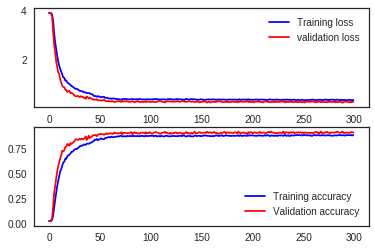

In [12]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [13]:
#load the model with best weights
model_.load_weights('weights.best.with_augmentation_new.hdf5')
#model.load_weights('saved_models/weights.best.with_augmentation.hdf5')
# get index of predicted alphabetnfor each image in test set
alphabet_predictions = [np.argmax(model_.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

from sklearn import metrics
y_true = [np.argmax(y_test) for y_test in test_targets]
f1_accuracy = 100* metrics.f1_score(y_true,alphabet_predictions, average = 'micro')
print('Test F1 accuracy: %.4f%%' % f1_accuracy)

Test F1 accuracy: 96.8000%


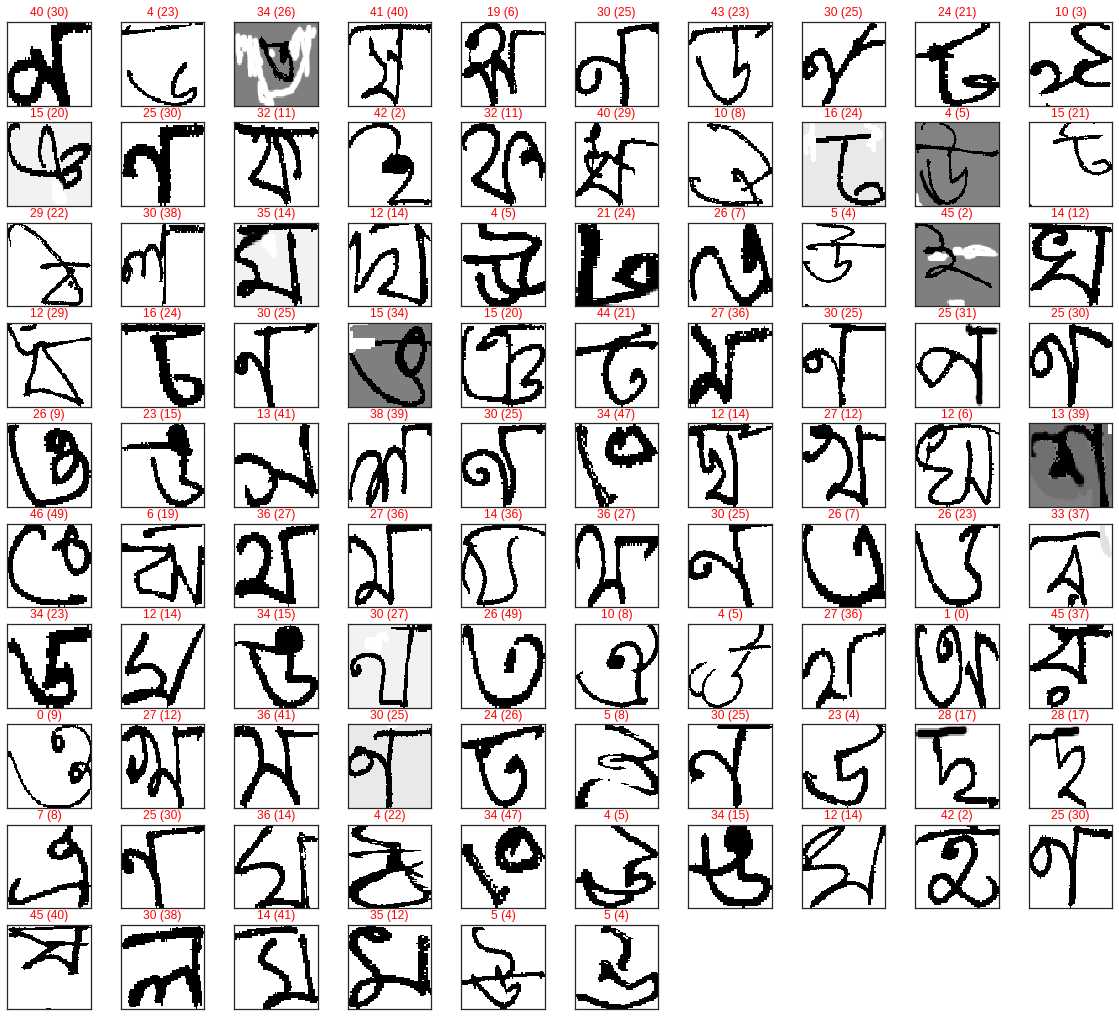

In [14]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_true, alphabet_predictions)

### Error Analysis
## Find all the test cases where the prediction does not match the actual.
## Trace back to file names and analyse 
## Loop over test tensors, predict and if doesnt match with actual add the file
## name to an array

error_files = []
error_images = []
for i, idx in enumerate(np.random.choice(test_tensors.shape[0], size=3000, replace=False)):
    pred_idx = alphabet_predictions[idx]
    true_idx = np.argmax(test_targets[idx])
    if pred_idx != true_idx:
        error_files.append(test_files[idx])
        error_images.append(idx)

error_files = np.array(error_files) 
error_images = np.array(error_images) 
errors=np.stack((error_images,error_files),axis=-1)
         

fig = plt.figure(figsize=(20,20))
i = 0 
for idx, pic in errors:
    idx = int(idx)
    ax = fig.add_subplot(11, 10, i + 1, xticks=[], yticks=[])
    
    #print ('Misclassified the file: ' + pic + ' As: ' + str (alphabet_predictions[idx] ) + ' instead of ' + str(np.argmax(test_targets[idx])) + ' Index: ' + str(idx))

    ax.imshow(np.squeeze(load_img(pic, target_size=(100,100), grayscale=True)), cmap = 'gray')
    ax.set_title("{} ({})".format(str (alphabet_predictions[idx] ), str(np.argmax(test_targets[idx]))),
                 color=("red"))
    i += 1



1.   Test F1 accuracy: 96.0667% Default
2.   Already 96.8%



In [17]:
import time
start_time = time.time()

### Prepare the Training, Validation and Test Datasets
def path_to_tensor(img_path):
    if 'bcc000060.db' not in img_path:
        # loads RGB image as PIL.Image.Image type
        img = load_img(img_path, target_size=(64, 64), grayscale=False)
        # convert PIL.Image.Image type to 3D tensor with shape (64, 64, 3)
        x = img_to_array(img)
        # convert 3D tensor to 4D tensor with shape (1, 64, 64, 3) and return 4D tensor
        return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in img_paths]
    return np.vstack(list_of_tensors)

# pre-process the data for Keras. We rescale the images by dividing every pixel in every image by 255. 
# So the scale is now 0-1 instead of 0-255.
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

# print number of training, validation, and test images
print(train_tensors.shape[0], 'train samples')
print(valid_tensors.shape[0], 'valid samples')
print(test_tensors.shape[0], 'test samples')

model_ = Sequential()
model_.add(Conv2D(filters = 16, kernel_size = (7,7), padding = 'Same', activation='relu', input_shape = (train_tensors.shape[1:])))
model_.add(Conv2D(filters = 32, kernel_size = (7,7), padding = 'Same', activation='relu'))
model_.add(MaxPooling2D(pool_size = (2,2)))
#model_.add(Dropout(0.2))

model_.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation='relu'))
model_.add(Conv2D(filters = 128, kernel_size = (4,4), padding = 'Same', activation = 'relu'))
model_.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model_.add(Dropout(0.3))

model_.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'Same', activation = 'relu'))

model_.add(Flatten())
model_.add(Dense(256, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(50, activation = 'sigmoid'))
#model_.summary()


from keras.optimizers import adam
from keras.callbacks import ReduceLROnPlateau
optimizer_ = adam(lr = 0.001, epsilon = 1e-08, decay = 0.0)
model_.compile(optimizer = optimizer_, loss = 'categorical_crossentropy', metrics = ['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',
                                           patience = 2,
                                           verbose = 1,
                                           factor = 0.5,
                                           min_lr = 0.00001)
epochs = 100
batch_size = 128


# Augment the training data 
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.2,  # randomly shift images vertically (10% of total height)
    rotation_range=15, 
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest') # randomly rotate images by 15 degrees

# create and configure augmented image generator
datagen_valid = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.2,  # randomly shift images vertically (10% of total height)
    rotation_range=15, 
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest')

# fit augmented image generator on data
datagen_train.fit(train_tensors)
datagen_valid.fit(valid_tensors)

from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='weights.best.with_augmentation_new.hdf5', verbose=1, 
                               save_best_only=True)

history = model_.fit_generator(datagen_train.flow(train_tensors, train_targets, batch_size=batch_size),
                                steps_per_epoch=train_tensors.shape[0] // batch_size,
                                epochs=epochs, 
                                verbose=2, 
                                callbacks=[checkpointer, learning_rate_reduction],
                                validation_data=datagen_valid.flow(valid_tensors, valid_targets, batch_size=batch_size),
                                validation_steps=valid_tensors.shape[0] // batch_size)

print("--- %s seconds ---" % (time.time() - start_time))

9600 train samples
2400 valid samples
3000 test samples
Epoch 1/100
 - 26s - loss: 3.8835 - acc: 0.0340 - val_loss: 3.7860 - val_acc: 0.0699

Epoch 00001: val_loss improved from inf to 3.78596, saving model to weights.best.with_augmentation_new.hdf5
Epoch 2/100
 - 22s - loss: 3.5804 - acc: 0.0820 - val_loss: 3.2675 - val_acc: 0.1554

Epoch 00002: val_loss improved from 3.78596 to 3.26753, saving model to weights.best.with_augmentation_new.hdf5
Epoch 3/100
 - 22s - loss: 3.3010 - acc: 0.1258 - val_loss: 2.9305 - val_acc: 0.2240

Epoch 00003: val_loss improved from 3.26753 to 2.93051, saving model to weights.best.with_augmentation_new.hdf5
Epoch 4/100
 - 22s - loss: 2.9329 - acc: 0.1940 - val_loss: 2.3853 - val_acc: 0.3372

Epoch 00004: val_loss improved from 2.93051 to 2.38531, saving model to weights.best.with_augmentation_new.hdf5
Epoch 5/100
 - 22s - loss: 2.5975 - acc: 0.2668 - val_loss: 2.0248 - val_acc: 0.4384

Epoch 00005: val_loss improved from 2.38531 to 2.02480, saving model t


Epoch 00019: val_loss did not improve
Epoch 20/100
 - 23s - loss: 0.8289 - acc: 0.7510 - val_loss: 0.5735 - val_acc: 0.8234

Epoch 00020: val_loss improved from 0.60610 to 0.57351, saving model to weights.best.with_augmentation_new.hdf5
Epoch 21/100
 - 22s - loss: 0.7715 - acc: 0.7583 - val_loss: 0.5388 - val_acc: 0.8372

Epoch 00021: val_loss improved from 0.57351 to 0.53877, saving model to weights.best.with_augmentation_new.hdf5
Epoch 22/100
 - 22s - loss: 0.7599 - acc: 0.7675 - val_loss: 0.4922 - val_acc: 0.8451

Epoch 00022: val_loss improved from 0.53877 to 0.49220, saving model to weights.best.with_augmentation_new.hdf5
Epoch 23/100
 - 23s - loss: 0.7483 - acc: 0.7741 - val_loss: 0.5144 - val_acc: 0.8407

Epoch 00023: val_loss did not improve
Epoch 24/100
 - 22s - loss: 0.7087 - acc: 0.7830 - val_loss: 0.4917 - val_acc: 0.8490

Epoch 00024: val_loss improved from 0.49220 to 0.49166, saving model to weights.best.with_augmentation_new.hdf5
Epoch 25/100
 - 22s - loss: 0.7083 - acc


Epoch 00039: val_loss did not improve
Epoch 40/100
 - 22s - loss: 0.4545 - acc: 0.8601 - val_loss: 0.3486 - val_acc: 0.8911

Epoch 00040: val_loss improved from 0.35210 to 0.34858, saving model to weights.best.with_augmentation_new.hdf5
Epoch 41/100
 - 23s - loss: 0.4523 - acc: 0.8628 - val_loss: 0.3455 - val_acc: 0.8915

Epoch 00041: val_loss improved from 0.34858 to 0.34554, saving model to weights.best.with_augmentation_new.hdf5
Epoch 42/100
 - 23s - loss: 0.4456 - acc: 0.8589 - val_loss: 0.3515 - val_acc: 0.8932

Epoch 00042: val_loss did not improve
Epoch 43/100
 - 23s - loss: 0.4289 - acc: 0.8619 - val_loss: 0.3235 - val_acc: 0.8980

Epoch 00043: val_loss improved from 0.34554 to 0.32346, saving model to weights.best.with_augmentation_new.hdf5
Epoch 44/100
 - 23s - loss: 0.4322 - acc: 0.8650 - val_loss: 0.3514 - val_acc: 0.8945

Epoch 00044: val_loss did not improve
Epoch 45/100
 - 23s - loss: 0.4092 - acc: 0.8718 - val_loss: 0.3004 - val_acc: 0.9032

Epoch 00045: val_loss impro

 - 23s - loss: 0.3318 - acc: 0.8969 - val_loss: 0.2666 - val_acc: 0.9175

Epoch 00062: val_loss did not improve
Epoch 63/100
 - 23s - loss: 0.3299 - acc: 0.8970 - val_loss: 0.2735 - val_acc: 0.9132

Epoch 00063: val_loss did not improve

Epoch 00063: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 64/100
 - 23s - loss: 0.3175 - acc: 0.9029 - val_loss: 0.2577 - val_acc: 0.9206

Epoch 00064: val_loss did not improve
Epoch 65/100
 - 23s - loss: 0.3232 - acc: 0.8983 - val_loss: 0.2796 - val_acc: 0.9119

Epoch 00065: val_loss did not improve

Epoch 00065: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
Epoch 66/100
 - 23s - loss: 0.3174 - acc: 0.9000 - val_loss: 0.2895 - val_acc: 0.9128

Epoch 00066: val_loss did not improve
Epoch 67/100
 - 23s - loss: 0.3297 - acc: 0.8942 - val_loss: 0.2712 - val_acc: 0.9197

Epoch 00067: val_loss did not improve

Epoch 00067: ReduceLROnPlateau reducing learning rate to 1e-05.
Epoch 68/100
 - 23s - loss: 0.3055 

 - 23s - loss: 0.3129 - acc: 0.9008 - val_loss: 0.2865 - val_acc: 0.9128

Epoch 00087: val_loss did not improve
Epoch 88/100
 - 23s - loss: 0.2954 - acc: 0.9084 - val_loss: 0.2660 - val_acc: 0.9154

Epoch 00088: val_loss did not improve
Epoch 89/100
 - 22s - loss: 0.3085 - acc: 0.9011 - val_loss: 0.2671 - val_acc: 0.9240

Epoch 00089: val_loss did not improve
Epoch 90/100
 - 23s - loss: 0.3036 - acc: 0.9031 - val_loss: 0.2734 - val_acc: 0.9158

Epoch 00090: val_loss did not improve
Epoch 91/100
 - 22s - loss: 0.3193 - acc: 0.9021 - val_loss: 0.2359 - val_acc: 0.9266

Epoch 00091: val_loss did not improve
Epoch 92/100
 - 23s - loss: 0.3235 - acc: 0.8959 - val_loss: 0.2758 - val_acc: 0.9188

Epoch 00092: val_loss did not improve
Epoch 93/100
 - 23s - loss: 0.3014 - acc: 0.9017 - val_loss: 0.2521 - val_acc: 0.9258

Epoch 00093: val_loss did not improve
Epoch 94/100
 - 23s - loss: 0.3161 - acc: 0.8980 - val_loss: 0.2668 - val_acc: 0.9167

Epoch 00094: val_loss did not improve
Epoch 95/100


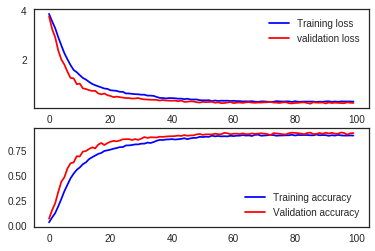

In [18]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [19]:
#load the model with best weights
model_.load_weights('weights.best.with_augmentation_new.hdf5')
#model.load_weights('saved_models/weights.best.with_augmentation.hdf5')
# get index of predicted alphabetnfor each image in test set
alphabet_predictions = [np.argmax(model_.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

from sklearn import metrics
y_true = [np.argmax(y_test) for y_test in test_targets]
f1_accuracy = 100* metrics.f1_score(y_true,alphabet_predictions, average = 'micro')
print('Test F1 accuracy: %.4f%%' % f1_accuracy)

Test F1 accuracy: 97.1667%


Total error: 85


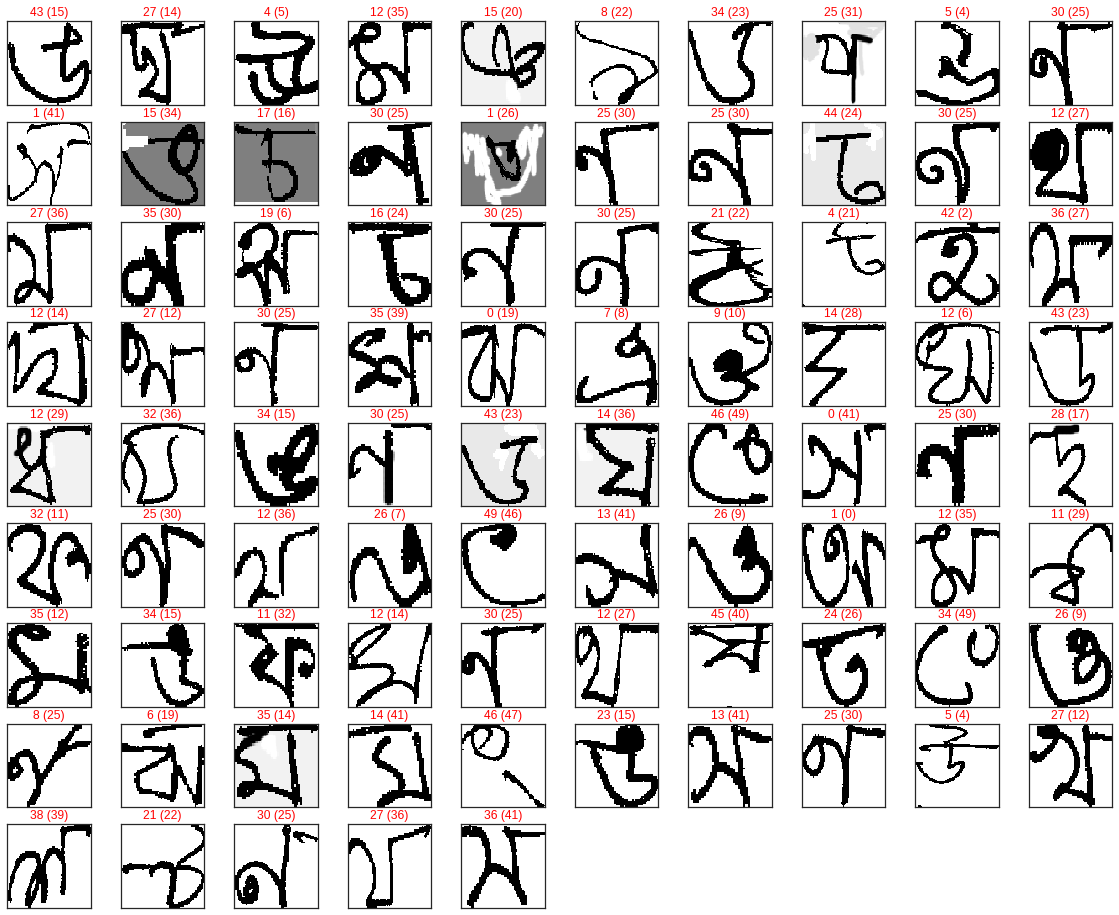

In [22]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_true, alphabet_predictions)

### Error Analysis
## Find all the test cases where the prediction does not match the actual.
## Trace back to file names and analyse 
## Loop over test tensors, predict and if doesnt match with actual add the file
## name to an array

error_files = []
error_images = []
for i, idx in enumerate(np.random.choice(test_tensors.shape[0], size=3000, replace=False)):
    pred_idx = alphabet_predictions[idx]
    true_idx = np.argmax(test_targets[idx])
    if pred_idx != true_idx:
        error_files.append(test_files[idx])
        error_images.append(idx)

print("Total error: "+ str(len(error_files)))
error_files = np.array(error_files) 

error_images = np.array(error_images) 
errors=np.stack((error_images,error_files),axis=-1)
         

fig = plt.figure(figsize=(20,20))
i = 0 
for idx, pic in errors:
    idx = int(idx)
    ax = fig.add_subplot(11, 10, i + 1, xticks=[], yticks=[])
    
    #print ('Misclassified the file: ' + pic + ' As: ' + str (alphabet_predictions[idx] ) + ' instead of ' + str(np.argmax(test_targets[idx])) + ' Index: ' + str(idx))

    ax.imshow(np.squeeze(load_img(pic, target_size=(100,100), grayscale=True)), cmap = 'gray')
    ax.set_title("{} ({})".format(str (alphabet_predictions[idx] ), str(np.argmax(test_targets[idx]))),
                 color=("red"))
    i += 1

In [23]:
import time
start_time = time.time()

### Prepare the Training, Validation and Test Datasets
def path_to_tensor(img_path):
    if 'bcc000060.db' not in img_path:
        # loads RGB image as PIL.Image.Image type
        img = load_img(img_path, target_size=(64, 64), grayscale=False)
        # convert PIL.Image.Image type to 3D tensor with shape (64, 64, 3)
        x = img_to_array(img)
        # convert 3D tensor to 4D tensor with shape (1, 64, 64, 3) and return 4D tensor
        return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in img_paths]
    return np.vstack(list_of_tensors)

# pre-process the data for Keras. We rescale the images by dividing every pixel in every image by 255. 
# So the scale is now 0-1 instead of 0-255.
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

# print number of training, validation, and test images
print(train_tensors.shape[0], 'train samples')
print(valid_tensors.shape[0], 'valid samples')
print(test_tensors.shape[0], 'test samples')

model_ = Sequential()
model_.add(Conv2D(filters = 16, kernel_size = (7,7), padding = 'Same', activation='relu', input_shape = (train_tensors.shape[1:])))
model_.add(Conv2D(filters = 32, kernel_size = (7,7), padding = 'Same', activation='relu'))
model_.add(MaxPooling2D(pool_size = (2,2)))
#model_.add(Dropout(0.2))

model_.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation='relu'))
model_.add(Conv2D(filters = 128, kernel_size = (4,4), padding = 'Same', activation = 'relu'))
model_.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model_.add(Dropout(0.3))

model_.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'Same', activation = 'relu'))

model_.add(Flatten())
model_.add(Dense(256, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(512, activation='relu'))
model_.add(Dropout(0.3))

model_.add(Dense(50, activation = 'sigmoid'))
#model_.summary()


from keras.optimizers import adam
from keras.callbacks import ReduceLROnPlateau
optimizer_ = adam(lr = 0.001, epsilon = 1e-08, decay = 0.0)
model_.compile(optimizer = optimizer_, loss = 'categorical_crossentropy', metrics = ['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',
                                           patience = 2,
                                           verbose = 1,
                                           factor = 0.5,
                                           min_lr = 0.00001)
epochs = 100
batch_size = 128


# Augment the training data 
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.2,  # randomly shift images vertically (10% of total height)
    rotation_range=15, 
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest') # randomly rotate images by 15 degrees

# create and configure augmented image generator
datagen_valid = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.2,  # randomly shift images vertically (10% of total height)
    rotation_range=15, 
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest')

# fit augmented image generator on data
datagen_train.fit(train_tensors)
datagen_valid.fit(valid_tensors)

from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='weights.best.with_augmentation_new.hdf5', verbose=1, 
                               save_best_only=True)

history = model_.fit_generator(datagen_train.flow(train_tensors, train_targets, batch_size=batch_size),
                                steps_per_epoch=train_tensors.shape[0] // batch_size,
                                epochs=epochs, 
                                verbose=2, 
                                callbacks=[checkpointer, learning_rate_reduction],
                                validation_data=datagen_valid.flow(valid_tensors, valid_targets, batch_size=batch_size),
                                validation_steps=valid_tensors.shape[0] // batch_size)

print("--- %s seconds ---" % (time.time() - start_time))

9600 train samples
2400 valid samples
3000 test samples
Epoch 1/100
 - 24s - loss: 3.8809 - acc: 0.0280 - val_loss: 3.8339 - val_acc: 0.0369

Epoch 00001: val_loss improved from inf to 3.83391, saving model to weights.best.with_augmentation_new.hdf5
Epoch 2/100
 - 22s - loss: 3.7886 - acc: 0.0374 - val_loss: 3.6239 - val_acc: 0.0668

Epoch 00002: val_loss improved from 3.83391 to 3.62392, saving model to weights.best.with_augmentation_new.hdf5
Epoch 3/100
 - 23s - loss: 3.4644 - acc: 0.0878 - val_loss: 3.0947 - val_acc: 0.1597

Epoch 00003: val_loss improved from 3.62392 to 3.09474, saving model to weights.best.with_augmentation_new.hdf5
Epoch 4/100
 - 23s - loss: 3.0287 - acc: 0.1494 - val_loss: 2.6688 - val_acc: 0.2569

Epoch 00004: val_loss improved from 3.09474 to 2.66879, saving model to weights.best.with_augmentation_new.hdf5
Epoch 5/100
 - 23s - loss: 2.6641 - acc: 0.2169 - val_loss: 2.3966 - val_acc: 0.3403

Epoch 00005: val_loss improved from 2.66879 to 2.39659, saving model t


Epoch 00019: val_loss improved from 0.72509 to 0.65963, saving model to weights.best.with_augmentation_new.hdf5
Epoch 20/100
 - 23s - loss: 0.9372 - acc: 0.7111 - val_loss: 0.7409 - val_acc: 0.7860

Epoch 00020: val_loss did not improve
Epoch 21/100
 - 23s - loss: 0.9155 - acc: 0.7181 - val_loss: 0.5906 - val_acc: 0.8342

Epoch 00021: val_loss improved from 0.65963 to 0.59064, saving model to weights.best.with_augmentation_new.hdf5
Epoch 22/100
 - 23s - loss: 0.8731 - acc: 0.7272 - val_loss: 0.6215 - val_acc: 0.8329

Epoch 00022: val_loss did not improve
Epoch 23/100
 - 23s - loss: 0.8589 - acc: 0.7397 - val_loss: 0.5585 - val_acc: 0.8498

Epoch 00023: val_loss improved from 0.59064 to 0.55853, saving model to weights.best.with_augmentation_new.hdf5
Epoch 24/100
 - 23s - loss: 0.8008 - acc: 0.7548 - val_loss: 0.5462 - val_acc: 0.8312

Epoch 00024: val_loss improved from 0.55853 to 0.54624, saving model to weights.best.with_augmentation_new.hdf5
Epoch 25/100
 - 23s - loss: 0.7768 - acc


Epoch 00040: val_loss did not improve

Epoch 00040: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 41/100
 - 23s - loss: 0.4840 - acc: 0.8501 - val_loss: 0.3457 - val_acc: 0.8967

Epoch 00041: val_loss improved from 0.35808 to 0.34572, saving model to weights.best.with_augmentation_new.hdf5
Epoch 42/100
 - 23s - loss: 0.4894 - acc: 0.8431 - val_loss: 0.3746 - val_acc: 0.8841

Epoch 00042: val_loss did not improve
Epoch 43/100
 - 23s - loss: 0.4960 - acc: 0.8449 - val_loss: 0.3381 - val_acc: 0.8967

Epoch 00043: val_loss improved from 0.34572 to 0.33811, saving model to weights.best.with_augmentation_new.hdf5
Epoch 44/100
 - 23s - loss: 0.4740 - acc: 0.8542 - val_loss: 0.3444 - val_acc: 0.9032

Epoch 00044: val_loss did not improve
Epoch 45/100
 - 23s - loss: 0.4784 - acc: 0.8447 - val_loss: 0.3352 - val_acc: 0.9023

Epoch 00045: val_loss improved from 0.33811 to 0.33524, saving model to weights.best.with_augmentation_new.hdf5
Epoch 46/100
 - 23s - loss: 0.4938


Epoch 00064: val_loss did not improve
Epoch 65/100
 - 23s - loss: 0.4689 - acc: 0.8525 - val_loss: 0.3373 - val_acc: 0.8945

Epoch 00065: val_loss did not improve
Epoch 66/100
 - 23s - loss: 0.4856 - acc: 0.8460 - val_loss: 0.3276 - val_acc: 0.9006

Epoch 00066: val_loss did not improve
Epoch 67/100
 - 23s - loss: 0.4649 - acc: 0.8524 - val_loss: 0.3364 - val_acc: 0.8971

Epoch 00067: val_loss did not improve
Epoch 68/100
 - 23s - loss: 0.4694 - acc: 0.8502 - val_loss: 0.3177 - val_acc: 0.9036

Epoch 00068: val_loss improved from 0.32679 to 0.31773, saving model to weights.best.with_augmentation_new.hdf5
Epoch 69/100
 - 23s - loss: 0.4716 - acc: 0.8466 - val_loss: 0.3535 - val_acc: 0.8954

Epoch 00069: val_loss did not improve
Epoch 70/100
 - 23s - loss: 0.4673 - acc: 0.8466 - val_loss: 0.3382 - val_acc: 0.8876

Epoch 00070: val_loss did not improve
Epoch 71/100
 - 23s - loss: 0.4660 - acc: 0.8515 - val_loss: 0.3501 - val_acc: 0.8984

Epoch 00071: val_loss did not improve
Epoch 72/100

 - 23s - loss: 0.4480 - acc: 0.8532 - val_loss: 0.3310 - val_acc: 0.9076

Epoch 00091: val_loss did not improve
Epoch 92/100
 - 23s - loss: 0.4805 - acc: 0.8512 - val_loss: 0.3569 - val_acc: 0.8980

Epoch 00092: val_loss did not improve
Epoch 93/100
 - 23s - loss: 0.4477 - acc: 0.8571 - val_loss: 0.3440 - val_acc: 0.8958

Epoch 00093: val_loss did not improve
Epoch 94/100
 - 23s - loss: 0.4712 - acc: 0.8527 - val_loss: 0.3382 - val_acc: 0.9028

Epoch 00094: val_loss did not improve
Epoch 95/100
 - 23s - loss: 0.4585 - acc: 0.8530 - val_loss: 0.3199 - val_acc: 0.8997

Epoch 00095: val_loss did not improve
Epoch 96/100
 - 23s - loss: 0.4434 - acc: 0.8575 - val_loss: 0.3316 - val_acc: 0.9054

Epoch 00096: val_loss did not improve
Epoch 97/100
 - 23s - loss: 0.4624 - acc: 0.8544 - val_loss: 0.3508 - val_acc: 0.8963

Epoch 00097: val_loss did not improve
Epoch 98/100
 - 23s - loss: 0.4598 - acc: 0.8554 - val_loss: 0.3406 - val_acc: 0.9054

Epoch 00098: val_loss did not improve
Epoch 99/100


Test F1 accuracy: 96.3667%
Total error: 109


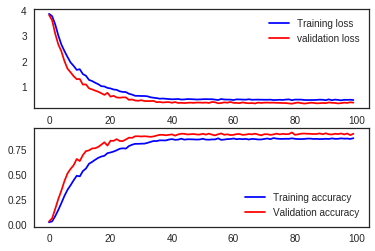

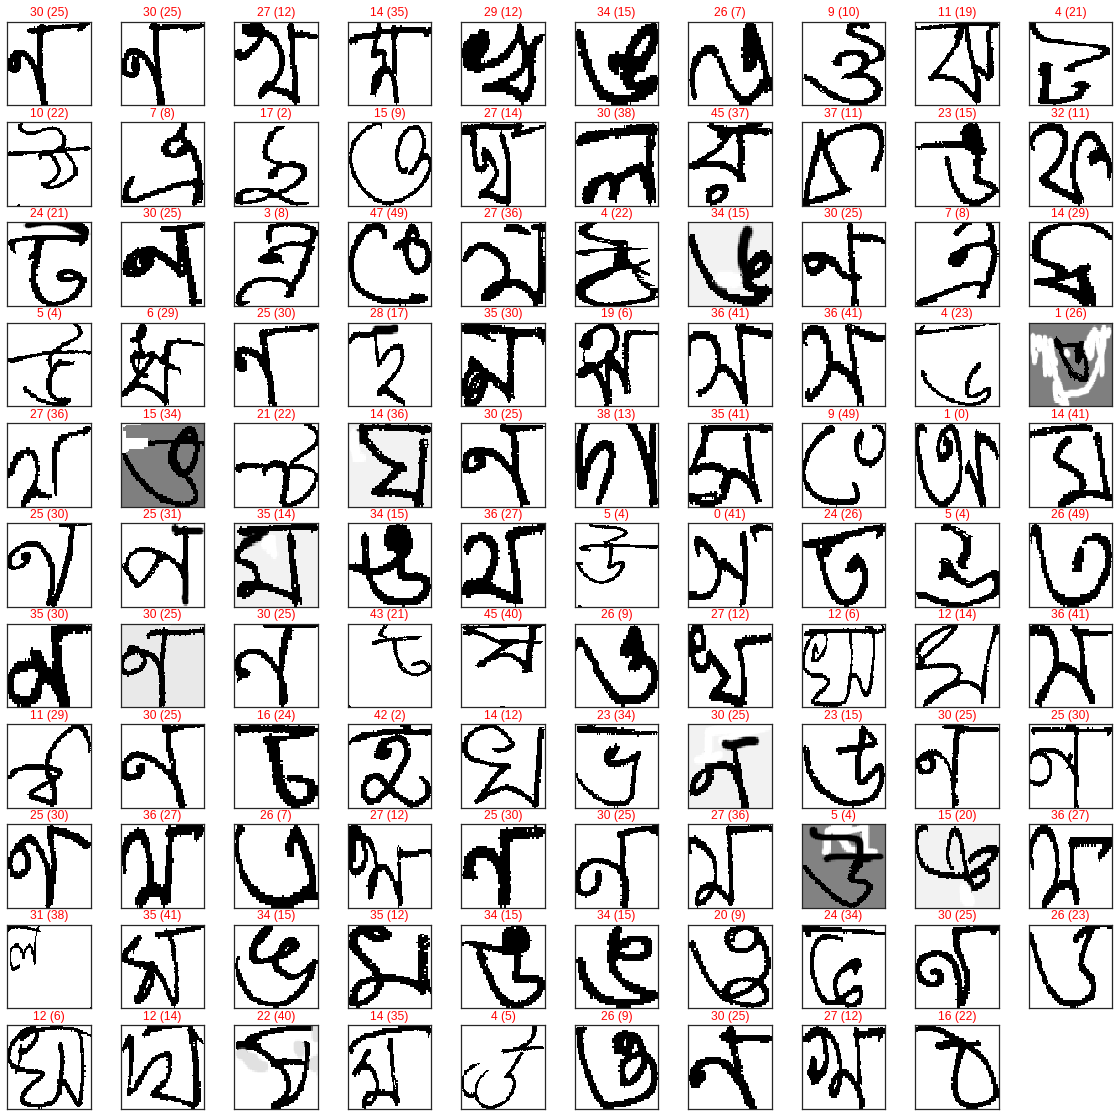

In [0]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

#load the model with best weights
model_.load_weights('weights.best.with_augmentation_new.hdf5')
#model.load_weights('saved_models/weights.best.with_augmentation.hdf5')
# get index of predicted alphabetnfor each image in test set
alphabet_predictions = [np.argmax(model_.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

from sklearn import metrics
y_true = [np.argmax(y_test) for y_test in test_targets]
f1_accuracy = 100* metrics.f1_score(y_true,alphabet_predictions, average = 'micro')
print('Test F1 accuracy: %.4f%%' % f1_accuracy)

#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_true, alphabet_predictions)

### Error Analysis
## Find all the test cases where the prediction does not match the actual.
## Trace back to file names and analyse 
## Loop over test tensors, predict and if doesnt match with actual add the file
## name to an array

error_files = []
error_images = []
for i, idx in enumerate(np.random.choice(test_tensors.shape[0], size=3000, replace=False)):
    pred_idx = alphabet_predictions[idx]
    true_idx = np.argmax(test_targets[idx])
    if pred_idx != true_idx:
        error_files.append(test_files[idx])
        error_images.append(idx)

print("Total error: "+ str(len(error_files)))
error_files = np.array(error_files) 

error_images = np.array(error_images) 
errors=np.stack((error_images,error_files),axis=-1)
         

fig = plt.figure(figsize=(20,20))
i = 0 
for idx, pic in errors:
    idx = int(idx)
    ax = fig.add_subplot(11, 10, i + 1, xticks=[], yticks=[])
    
    #print ('Misclassified the file: ' + pic + ' As: ' + str (alphabet_predictions[idx] ) + ' instead of ' + str(np.argmax(test_targets[idx])) + ' Index: ' + str(idx))

    ax.imshow(np.squeeze(load_img(pic, target_size=(100,100), grayscale=True)), cmap = 'gray')
    ax.set_title("{} ({})".format(str (alphabet_predictions[idx] ), str(np.argmax(test_targets[idx]))),
                 color=("red"))
    i += 1